# CSMODEL Machine Project Phase 1 - Group 2
July 2025

Members:
* Buenavente, Djuvalle Antoiney P.
* Clavano, Angelica Therese I. (Jack)
* Tabuzo, Vincent Renz H. (Renz)
* Rosales, Kean Louis Rodriguez

## Section 1: Dataset Description

The chosen dataset is the [NBA Player Statistics Dataset](https://www.kaggle.com/datasets/yagizfiratt/nba-players-database) from Kaggle. The dataset contains information about current and former NBA players including their statistics - all collected from the official NBA website. The dataset was downloaded on May 23, 2025.

### 1.1 Dataset Features and Structure

Total: 26 variables, with each row (observation) representing a player.
The dataset is in CSV format and contains the following columns:
* `PERSON_ID`: Reference number on NBA website.
* `PLAYER_LAST_NAME`: The player's last name in String format. 
* `PLAYER_FIRST_NAME`: The player's first name in String format. 
* `PLAYER_SLUG`: Players name and last name (Kagglehub)
* `TEAM_ID`: NBA Teams ID (Kagglehub)
* `TEAM_SLUG`: NBA Teams tags (Kagglehub) 
* `IS_DEFUNCT`: Players playing status (Kagglehub)
* `TEAM_CITY`: Team's City (Kagglehub) 
* `TEAM_NAME`: Team Name (Kagglehub) 
* `TEAM_ABBREVIATION`: Teams' Tag (Kagglehub)
* `JERSEY_NUMBER`: Contains the player's jersey number, used for identification on the court.
* `POSITION`: The player's position on the court.
* `HEIGHT`: The player's height at the time of collection.
* `WEIGHT`: The player's weight at the time of collection.
* `COLLEGE`: The college where the player comes from. 
* `COUNTRY`: The player's country of origin in String format.
* `DRAFT_YEAR`: The year the player was drafted during the annual NBA draft
* `DRAFT_ROUND`: The class of the player drafted (Values are `1` or `2`, where `1` is better).
* `DRAFT_NUMBER`: The overall order in which a player was selected during the NBA Draft.
* `ROSTER_STATUS`: Contains the roster status, 1 for active players and blank for inactive players. (?)
* `PTS`: Points
* `REB`: Rebounds
* `AST`: Assists
* `STATS_TIMEFRAME`: Career or Season.
* `FROM_YEAR`: This represents the first year a player appeared in the league.
* `TO_YEAR`: This represents the final year a player appeared in the league.

---

#### Categorical Variables
* `PLAYER_LAST_NAME`: The player's last name in String format.
* `PLAYER_FIRST_NAME`: The player's first name in String format.
* `PLAYER_SLUG`: Players name and last name (Kagglehub)
* `TEAM_SLUG`: NBA Teams tags (Kagglehub)
* `TEAM_CITY`: Team's City (Kagglehub)
* `TEAM_NAME`: Team Name (Kagglehub)
* `TEAM_ABBREVIATION`: Teams' Tag (Kagglehub)
* `POSITION`: The player's position on the court.
* `COLLEGE`: The college where the player comes from.
* `COUNTRY`: The player's country of origin in String format.
* `STATS_TIMEFRAME`: Career or Season.

#### Numerical Variables
* `PERSON_ID`: Reference number on NBA website.
* `TEAM_ID`: NBA Teams ID (Kagglehub)
* `IS_DEFUNCT`: Players playing status (Kagglehub)
* `JERSEY_NUMBER`: Contains the player's jersey number, used for identification on the court.
* `HEIGHT`: The player's height at the time of collection.
* `WEIGHT`: The player's weight at the time of collection.
* `DRAFT_YEAR`: the year the player was drafted during the annual NBA draft
* `DRAFT_ROUND`: The class of the player drafted (Values are `1` or `2`, where `1` is better).
* `DRAFT_NUMBER`: The overall order in which a player was selected during the NBA Draft.
* `ROSTER_STATUS`: Contains the roster status, 1 for active players and blank for inactive players.
* `PTS`: Points
* `REB`: Rebounds
* `AST`: Assists
* `FROM_YEAR`: This represents the first year a player appeared in the league.
* `TO_YEAR`: This represents the final year a player appeared in the league.

## 1.2 Dataset Collection Methods
The dataset was obtained from the official NBA website as noted on its Kaggle listing. Based on the dataset’s provenance section, it was collected using Python, by making HTTP requests to the NBA’s public web endpoints. The uploader used Python’s requests library to automate the retrieval of player statistics and related information from nba.com. Once gathered, the data was structured into a CSV file containing 26 variables.

This dataset does not support automatic syncing on Kaggle, meaning it did not update when future changes to the NBA website happened.

While the use of the official NBA website suggests reliability, the manual part of the scraping and formatting process by a third party can introduce some issues such as outdated data, missing fields, or inconsistencies in formatting.

## 1.3 Potential Implications
The NBA Player Statistic Dataset from Kaggle stated that the data originally came from the official nba.com website. It contains statistics on both current and former NBA players dating back to 1946; however, it does not specify how recent the dataset is, so we can only assume the dataset is up to date until the month it is uploaded to Kaggle, which is around May 2025.

One important caveat was mentioned on the official nba.com website that the stat ‘Rebounds’ was only being recorded since 1950. As a result, the data for older players may have been incomplete, which may potentially skew certain analyses of data. This caveat will be worth keeping in mind when interpreting results related to the ‘Rebounds’ stat.

## Section 2: Target Research Question

For our research, we want to cover the following main question: How do team context (franchise, roster stability), player role (position), and career trajectory (draft history, tenure) influence individual NBA player performance (PTS, REB, AST)? 

Where, in this context, roster stability refers to how many players stay vs. leave year-to-year AND the duration of key players who stay together the most. Career trajectory refers to the progression of a player's performance, role, and achievements over time. In our study, it captures how variables like draft position, team changes, and longevity shape a player's statistical output (PTS, REB, AST) and career outcomes.

We also have the following supporting questions: 
1. Do certain teams (TEAM_NAME) have significantly higher player performance (PTS, REB, AST) after controlling for position (POSITION) and draft capital (DRAFT_ROUND/NUMBER)?
2. How do performance metrics (PTS, REB, AST) vary by player position (POSITION), and are certain positions prioritized by specific teams (TEAM_NAME)?
3. Do players who change teams (PLAYER_NAME with TEAM_NAME changes) show significant differences in performance (PTS, REB, AST) before/after moving?

## Section 3: Data Preprocessing

### 3.1 Prerequisites
This section will import the necessary libraries used for this entire project and load the dataset into a pandas DataFrame.

In [98]:
# uncomment if needed, like running on Google Colab. Use python 3.12 
# pip install numpy pandas matplotlib scikit-learn ydata-profiling kneed
# pip install -r requirements.txt

In [99]:
import numpy as np                              # Numerical computing
import pandas as pd                             # Data manipulation
import matplotlib                               # Visualization
import seaborn as sns                           # Visualization
import matplotlib.pyplot as plt                 # Visualization
from ydata_profiling import ProfileReport       # ydataprofiling summary for EDA
import scipy.stats                              # Summary Statistics
from scipy.stats import f_oneway                # EDA
from scipy.stats import shapiro                 # EDA
from scipy.stats import ttest_rel               # EDA
from scipy.stats import chi2_contingency        # EDA
from statsmodels.formula.api import ols         # EDA
from statsmodels.stats.anova import anova_lm    # EDA

# matplotlib settings from notebooks
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
nba_df = pd.read_csv('./data/PlayerIndex_nba_stats.csv')
nba_df

,PERSON_ID,PLAYER_LAST_NAME,PLAYER_FIRST_NAME,PLAYER_SLUG,TEAM_ID,TEAM_SLUG,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,76001,Abdelnaby,Alaa,alaa-abdelnaby,1610612757,blazers,0,Portland,Trail Blazers,POR,...,1990.0,1.0,25.0,NaN,5.7,3.3,0.3,Career,1990,1994
1,76002,Abdul-Aziz,Zaid,zaid-abdul-aziz,1610612745,rockets,0,Houston,Rockets,HOU,...,1968.0,1.0,5.0,NaN,9.0,8.0,1.2,Career,1968,1977
2,76003,Abdul-Jabbar,Kareem,kareem-abdul-jabbar,1610612747,lakers,0,Los Angeles,Lakers,LAL,...,1969.0,1.0,1.0,NaN,24.6,11.2,3.6,Career,1969,1988
3,51,Abdul-Rauf,Mahmoud,mahmoud-abdul-rauf,1610612743,nuggets,0,Denver,Nuggets,DEN,...,1990.0,1.0,3.0,NaN,14.6,1.9,3.5,Career,1990,2000
4,1505,Abdul-Wahad,Tariq,tariq-abdul-wahad,1610612758,kings,0,Sacramento,Kings,SAC,...,1997.0,1.0,11.0,NaN,7.8,3.3,1.1,Career,1997,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,1627826,Zubac,Ivica,ivica-zubac,1610612746,clippers,0,LA,Clippers,LAC,...,2016.0,2.0,32.0,1.0,16.8,12.6,2.7,Season,2016,2024
5021,78650,Zunic,Matt,matt-zunic,1610610036,NaN,1,Washington,Capitols,WAS,...,1947.0,NaN,NaN,NaN,4.9,NaN,0.9,Career,1948,1948
5022,1641783,da Silva,Tristan,tristan-da-silva,1610612753,magic,0,Orlando,Magic,ORL,...,2024.0,1.0,18.0,1.0,7.2,3.3,1.5,Season,2024,2024
5023,1628427,Čančar,Vlatko,vlatko-čančar,1610612743,nuggets,0,Denver,Nuggets,DEN,...,2017.0,2.0,49.0,1.0,1.8,2.5,0.7,Season,2019,2024


In [101]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PERSON_ID          5025 non-null   int64  
 1   PLAYER_LAST_NAME   5025 non-null   object 
 2   PLAYER_FIRST_NAME  5024 non-null   object 
 3   PLAYER_SLUG        5025 non-null   object 
 4   TEAM_ID            5025 non-null   int64  
 5   TEAM_SLUG          4759 non-null   object 
 6   IS_DEFUNCT         5025 non-null   int64  
 7   TEAM_CITY          5025 non-null   object 
 8   TEAM_NAME          5025 non-null   object 
 9   TEAM_ABBREVIATION  5025 non-null   object 
 10  JERSEY_NUMBER      4674 non-null   object 
 11  POSITION           4977 non-null   object 
 12  HEIGHT             4978 non-null   object 
 13  WEIGHT             4972 non-null   float64
 14  COLLEGE            5024 non-null   object 
 15  COUNTRY            5025 non-null   object 
 16  DRAFT_YEAR         3700 

### 3.2 Data Cleaning

First, we'll check for duplicate data.

In [102]:
duplicate_count = nba_df.duplicated().sum()
duplicate_count

np.int64(0)

There are no duplicates in our dataset. Finally, we will do a check to remove columns that have no data.

In [103]:
empty_columns = [
    col for col in nba_df.columns
    if nba_df[col].astype(str).str.strip().eq('').all()
]
empty_columns

[]

Since there are no columns that are empty, we can begin with the data cleaning.

#### Dropping `TEAM_SLUG`
The 'TEAM_SLUG' is the NBA team's Tag. It is dropped as they don't add useful information for our analysis.

In [104]:
print(nba_df['TEAM_SLUG'].unique()) # found nan values
nba_df = nba_df.drop(['TEAM_SLUG'], axis=1)

['blazers' 'rockets' 'lakers' 'nuggets' 'kings' 'grizzlies' 'warriors'
 'sixers' nan 'thunder' 'knicks' 'clippers' 'magic' 'suns' 'pistons'
 'nets' 'hawks' 'heat' 'cavaliers' 'hornets' 'raptors' 'mavericks'
 'celtics' 'pelicans' 'wizards' 'spurs' 'bucks' 'timberwolves' 'bulls'
 'pacers' 'jazz']


#### Cleaning `TEAM_CITY`
The 'TEAM_CITY' is the NBA team's City. This column is fairly clean and it will be left untouched.

In [105]:
nba_df['TEAM_CITY'].unique()

array(['Portland', 'Houston', 'Los Angeles', 'Denver', 'Sacramento',
       'Memphis', 'Golden State', 'Philadelphia', 'Pittsburgh',
       'Oklahoma City', 'New York', 'LA', 'Orlando', 'Phoenix', 'Detroit',
       'Brooklyn', 'Atlanta', 'Miami', 'Cleveland', 'Charlotte',
       'Toronto', 'Dallas', 'Boston', 'New Orleans', 'Washington',
       'San Antonio', 'Milwaukee', 'Minnesota', 'Chicago', 'Indiana',
       'Utah', 'Baltimore', 'St. Louis', 'Indianapolis', 'Providence',
       'Waterloo', 'Sheboygan', 'Anderson'], dtype=object)

#### Cleaning `TEAM_NAME`
The 'TEAM_NAME' is the NBA team's Name. This column is fairly clean and it will be left untouched.

In [106]:
nba_df['TEAM_NAME'].unique()

array(['Trail Blazers', 'Rockets', 'Lakers', 'Nuggets', 'Kings',
       'Grizzlies', 'Warriors', '76ers', 'Ironmen', 'Thunder', 'Knicks',
       'Clippers', 'Magic', 'Suns', 'Pistons', 'Nets', 'Hawks', 'Heat',
       'Cavaliers', 'Hornets', 'Raptors', 'Mavericks', 'Celtics',
       'Pelicans', 'Wizards', 'Spurs', 'Bucks', 'Timberwolves', 'Bulls',
       'Pacers', 'Jazz', 'Bullets', 'Falcons', 'Stags', 'Bombers',
       'Olympians', 'Capitols', 'Rebels', 'Steamrollers', 'Huskies',
       'Jets', 'Redskins', 'Packers'], dtype=object)

#### Cleaning `TEAM_ABBREVIATION`
The 'TEAM_ABBREVIATION' is the NBA team's name that appears in the scoreboard or when the name needs to be shortened/compacted. This column is fairly clean and it will be left untouched.

In [107]:
nba_df['TEAM_ABBREVIATION'].unique()

array(['POR', 'HOU', 'LAL', 'DEN', 'SAC', 'MEM', 'GSW', 'PHI', 'PIT',
       'OKC', 'NYK', 'LAC', 'ORL', 'PHX', 'DET', 'BKN', 'ATL', 'MIA',
       'CLE', 'CHA', 'TOR', 'DAL', 'BOS', 'NOP', 'WAS', 'SAS', 'MIL',
       'MIN', 'CHI', 'IND', 'UTA', 'BAL', 'DEF', 'CHS', 'BOM', 'INO',
       'CLR', 'PRO', 'HUS', 'WAT', 'JET', 'DN ', 'SHE', 'AND'],
      dtype=object)

#### Cleaning `POSITION`
The 'POSITION' columnn describes the listed official position that the player is playing. 

In [108]:
nba_df['POSITION'].unique()

array(['F', 'C', 'G', 'F-G', 'C-F', 'F-C', 'G-F', nan], dtype=object)

There are NaN positions in the dataframe, it can either mean that the player has not officially played in an NBA game, or there might be an external circumstance that has cut their career short.

In [109]:
nan_positions = nba_df[nba_df['POSITION'].isna()]
print(nan_positions)

      PERSON_ID PLAYER_LAST_NAME PLAYER_FIRST_NAME          PLAYER_SLUG  \
293       76137           Becker               Moe           moe-becker   
312      203968          Benimon          Jerrelle     jerrelle-benimon   
715       76359           Carter              Jake          jake-carter   
760       76380           Chaney              John          john-chaney   
770      203805           Cherry              Will          will-cherry   
791      203565      Christopher           Patrick  patrick-christopher   
819       76407            Cloyd              Paul           paul-cloyd   
894       76451           Corley               Ken           ken-corley   
1064      76548          Dehnert               Red          red-dehnert   
1247     202197          Edwards             Shane        shane-edwards   
1301      76682         Eskridge              Jack        jack-eskridge   
1396       1829         Fontaine               Ike         ike-fontaine   
1481      76769          

Since a player with a NaN position means they did not play in the NBA but are part of the team, we can drop the rows with those values

In [110]:
nba_df = nba_df.dropna(subset=['POSITION'])

#### Cleaning `COLLEGE`
The 'COLLEGE' column contains the college in which a player played in.

In [111]:
nba_df['COLLEGE'].unique()

array(['Duke', 'Iowa State', 'UCLA', 'Louisiana State', 'San Jose State',
       'California', 'Indiana', 'Western Kentucky', 'Salem',
       'FC Barcelona', 'Memphis', 'Pepperdine', 'Long Island-Brooklyn',
       'Oral Roberts', 'Hillsdale', 'Baylor', 'Oklahoma', 'Northwestern',
       'Arizona', 'St. Bonaventure', 'Boston College', 'Pittsburgh',
       'Syracuse', 'Kentucky', 'Louisville', 'Loyola-Marymount',
       'Connecticut', 'Kansas', 'Michigan State', 'DePaul',
       'Missouri State', 'Brigham Young', 'Hyeres-Toulon',
       'Morehead State', 'California State-Fullerton', 'Illinois State',
       'Florida State', 'Fresno State', 'Loyola-Maryland', 'Galatasaray',
       'University of Texas at Austin', 'Virginia', 'South Florida',
       'West Virginia', 'Tennessee', 'Creighton', 'Virginia Tech',
       'Marshall', 'Texas', 'Pennsylvania', 'Temple', 'Villanova',
       'Oklahoma State', 'UNLV', 'Weber State', 'Rice', 'Duquesne',
       'Liberty', 'Georgia Tech', 'Penn State', 

Checking for NaN values in the college column 

In [112]:
nan_college = nba_df[nba_df['COLLEGE'].isna()]
print(nan_college)

      PERSON_ID PLAYER_LAST_NAME PLAYER_FIRST_NAME      PLAYER_SLUG  \
1150    1629635        Doumbouya             Sekou  sekou-doumbouya   

         TEAM_ID  IS_DEFUNCT    TEAM_CITY TEAM_NAME TEAM_ABBREVIATION  \
1150  1610612747           0  Los Angeles    Lakers               LAL   

     JERSEY_NUMBER  ... DRAFT_YEAR DRAFT_ROUND  DRAFT_NUMBER ROSTER_STATUS  \
1150            45  ...     2019.0         1.0          15.0           NaN   

      PTS  REB  AST  STATS_TIMEFRAME  FROM_YEAR  TO_YEAR  
1150  5.6  2.8  0.7           Career       2019     2021  

[1 rows x 25 columns]


Only one player in the entire dataset has a NaN college, Sekou Doumbouya, but upon checking other sources, Doumbouya entered INSEP or the National Institute of Sport, Expertise, and Performance.

In [113]:
nba_df.loc[
    (nba_df['PLAYER_LAST_NAME'] == 'Doumbouya') & (nba_df['PLAYER_FIRST_NAME'] == 'Sekou'),
    'COLLEGE'
] = 'INSEP'


#### Cleaning `HEIGHT`
The 'HEIGHT' is the recently recorded height of the player. This column follows the string format 'feet-inches', for example '6-10', and it contains NaN values. The following steps will be done to fix this.
1. Convert all string values into float values in inches
2. Fill missing values with the mean of the column

In [114]:
# print(nba_df['HEIGHT'].isnull().unique()) # found nan values
# print(nba_df['HEIGHT'].unique()) # height is a string following feet-inches format i.e. '6-10'

def strHeightToInch(strHeight):
    if pd.isna(strHeight): return np.nan

    feet, inches = strHeight.split('-')
    newHeight = float(feet) * 12 + float(inches)
    # print(feet, inches, newHeight)
    return newHeight

nba_df['HEIGHT'] = nba_df['HEIGHT'].apply(strHeightToInch)
nba_df['HEIGHT'] = nba_df['HEIGHT'].fillna(nba_df['HEIGHT'].dropna().mean())

#### Cleaning `WEIGHT`
The 'WEIGHT' is the recently recorded weight of the player. It is discovered that this column contains NaN values which will be filled with the mean of the column.

In [115]:
# print(nba_df['WEIGHT'].isnull().unique()) # found nan values
# print(nba_df['WEIGHT'].unique())

nba_df['WEIGHT'] = nba_df['WEIGHT'].fillna(nba_df['WEIGHT'].dropna().mean())

#### Cleaning `DRAFT_YEAR`
The 'DRAFT_YEAR' is the year the player was drafted during the annual NBA draft. It is discovered that this column contains NaN values which will be left for proper NaN value handling because not all players joined the NBA draft.

In [116]:
print(nba_df['DRAFT_YEAR'].isnull().unique()) # found nan values
print(nba_df['DRAFT_YEAR'].unique())

[False  True]
[1990. 1968. 1969. 1997. 1996. 1976. 1956.   nan 2013. 2020. 2005. 1953.
 1985. 2012. 1975. 1970. 2006. 2014. 1986. 2017. 2018. 2007. 2022. 1981.
 2008. 1966. 2016. 2010. 1959. 2021. 1982. 1995. 2000. 1991. 2019. 1987.
 2011. 2004. 1971. 1980. 1994. 1998. 2002. 1967. 1974. 2015. 1978. 1988.
 1989. 1984. 1954. 2003. 2001. 1950. 1955. 1977. 1960. 1983. 1973. 1999.
 2009. 1948. 1952. 2023. 1979. 1993. 1949. 1964. 1972. 1951. 1992. 1965.
 1958. 1962. 1961. 1947. 1957. 2024. 1963.]


#### Cleaning `DRAFT_ROUND`
The 'DRAFT_ROUND' is the class of the player drafted (Values are `1` or `2`, where `1` is better). It is discovered that this column contains values that are out of range, all of these values that are greater than `2` hence it will be replaced with `2`. On the other hand, NaN values will be left for proper NaN value handling because not all players joined through the NBA draft.

In [117]:
print(nba_df['DRAFT_ROUND'].isnull().unique()) # found nan values
print(nba_df['DRAFT_ROUND'].value_counts())

def outOfRangeToMax(round):
    if pd.isna(round): return np.nan

    if (round > 2):
        return float(2)
    
    return round

nba_df['DRAFT_ROUND'] = nba_df['DRAFT_ROUND'].apply(outOfRangeToMax)

[False  True]
DRAFT_ROUND
1.0     1623
2.0     1217
3.0      251
4.0      133
5.0       77
6.0       50
7.0       42
8.0       39
10.0      17
9.0       14
11.0      10
0.0       10
12.0       7
19.0       2
17.0       2
13.0       1
14.0       1
15.0       1
20.0       1
Name: count, dtype: int64


#### Cleaning `DRAFT_NUMBER`
The `DRAFT_NUMBER` represents the overall order in which a player was selected during the NBA Draft.

In [118]:
nba_df['DRAFT_NUMBER'].unique()

array([ 25.,   5.,   1.,   3.,  11.,  43.,  nan,  32.,  20.,  60.,  40.,
        37.,   4., 120.,  54.,  22.,  66.,  12.,  39.,  14.,  79.,  27.,
        28.,  31.,  50.,  18.,  16.,  30.,  53.,   2.,  76.,  29.,  13.,
         8.,  17.,  26.,  71.,  21.,  49., 103.,  33.,  36.,  35.,  92.,
        41.,  23., 146.,  73.,  10.,  44.,  47.,  15.,  51.,  19.,   6.,
        74.,   9.,  48.,  38., 101.,  55.,  46.,  24.,   7.,  45., 156.,
        77., 134., 180.,  57.,  87., 106.,  58.,  84.,  62.,  83.,  64.,
        42.,  67.,  56.,  72.,  59.,  52., 147.,  34., 139.,  81., 154.,
        86.,  69.,  82., 130., 187.,  70., 165., 109.,  91.,  89.,  94.,
        95., 159.,  75.,  61., 111., 160., 113., 185.,  68.,  78., 169.,
        98., 155., 150., 118., 105.,  99., 140., 110., 104., 157., 100.,
       136., 133., 166.,  93.,  65.,  63., 204.,  90., 117., 148., 151.,
       215.,   0.,  80., 122.,  85.,  97., 129., 124., 158., 107., 102.,
       115.,  88., 175., 125., 149., 127., 198., 11

There are NaN values in the draft number, it could mean that the player is undrafted and has entered the NBA through a different contract. 

In [119]:
nba_draft_number_nan = nba_df[nba_df['DRAFT_NUMBER'].isna()]
print(nba_draft_number_nan)

      PERSON_ID PLAYER_LAST_NAME PLAYER_FIRST_NAME      PLAYER_SLUG  \
7         76006             Able            Forest      forest-able   
8         76007        Abramovic              John   john-abramovic   
12        76008         Ackerman            Donald  donald-ackerman   
14        76010            Acton           Charles    charles-acton   
19      1629121            Adams            Jaylen     jaylen-adams   
...         ...              ...               ...              ...   
5003      78639          Zawoluk            Robert   robert-zawoluk   
5007      78642           Zeller              Hank      hank-zeller   
5008     202545           Zeller              Luke      luke-zeller   
5018      78647             Zoet               Jim         jim-zoet   
5021      78650            Zunic              Matt       matt-zunic   

         TEAM_ID  IS_DEFUNCT     TEAM_CITY TEAM_NAME TEAM_ABBREVIATION  \
7     1610612755           0  Philadelphia     76ers               PHI   

To fill these NaN values, we can use 0 to represent the "undrafted" players. 

In [120]:
nba_df['DRAFT_NUMBER'] = nba_df['DRAFT_NUMBER'].fillna(0)

#### Cleaning `ROSTER_STATUS`
Roster status indicates whether a player is currently active, inactive, or not on the team's official roster during a given season.

In [121]:
nba_df['ROSTER_STATUS'].unique()

array([nan,  1.])

There are only 2 values, 1 and NaN, 1 means that a player is active on the roster, NaN could mean that the player is inactive or retired. To clean this out, we can change the NaN values to 0.

In [122]:
nba_df['ROSTER_STATUS'] = nba_df['ROSTER_STATUS'].fillna(0)

#### Cleaning `POINTS`
In the NBA, points represent the total number of scores a player accumulates through made field goals and free throws during a game. However, this column represents the amount of points a player has averaged in their entire career. 

In [123]:
nba_df['PTS'].unique()

array([ 5.7,  9. , 24.6, 14.6,  7.8, 18.1,  5.6,  0. ,  9.5,  5.3,  6.6,
        2.7,  1.5,  3.6,  3.3,  4.9, 14.1,  8.7,  2.5,  3.2, 14.7,  3.9,
        5.8,  1.7,  7.7,  4.6, 10.8, 10.4,  2.1, 20. , 11.5,  3.5,  1. ,
        7.5, 12.5,  2.3,  3.1, 19.1,  5.1,  1.3,  5.5,  4.2,  0.6,  8.9,
        9.4,  4.4,  3.7,  1.8, 10.6, 13.5,  2.9,  4.8, 13.4, 18.9,  2.6,
        8.1,  1.9,  5.4, 10.1, 10.3,  6.2,  4.5,  4. ,  7.3,  2. ,  3. ,
       12. ,  1.6, 12.6,  5.9, 14.4, 12.3,  7.4, 12.2,  0.9,  6.9,  5.2,
       30.4,  2.4, 22.5,  2.2,  6.3, 18. ,  1.2,  2.8,  7.1, 18.8, 20.7,
       22.8,  3.8,  9.8,  9.2,  6.8,  nan,  4.7,  6.5,  0.7,  9.9,  8. ,
        7.6, 16.9,  8.3,  0.3, 10.5,  9.7,  6.7,  8.8, 12.8, 15. ,  1.1,
       25.2, 12.4,  4.3, 25.9, 19.2, 11.3, 12.1,  1.4, 14.3, 22.1, 11. ,
        8.2, 19.3, 15.8, 11.7,  8.6, 21.1,  9.3, 23.2, 11.2,  3.4,  6. ,
        6.4,  6.1, 14. ,  8.4, 27.4, 17. , 15.9, 16.3, 16. ,  4.1,  8.5,
       20.1, 11.4,  7. ,  9.1, 15.2, 20.3,  5. , 24

There are players who have NaN, meaning they might have not scored in an NBA game, so to clean this, we change the NaN to zeroes. 

In [124]:
nba_df['PTS'] = nba_df['PTS'].fillna(0)

#### Cleaning `COUNTRY`
The 'COUNTRY' column contains the country of origin for each player.
This step ensures that:
1. Any leading/trailing whitespaces are removed.
2. Empty strings are converted to NaN for proper missing value handling.

In [125]:
# print(nba_df['COUNTRY'].unique())
nba_df['COUNTRY'] = nba_df['COUNTRY'].astype(str).str.strip()
nba_df.loc[nba_df['COUNTRY'] == '', 'COUNTRY'] = np.nan

#### Cleaning `STATS_TIMEFRAME`
 The `STATS_TIMEFRAME` column indicates the period over which the player's stats were aggregated. 
 It is of type str.
 <br>
 Therefore, we will :
 1. Remove unnecessary whitespace.
 2. Replace blank entries with NaN to standardize missing data.

In [126]:
# print(nba_df['STATS_TIMEFRAME'].unique())
nba_df['STATS_TIMEFRAME'] = nba_df['STATS_TIMEFRAME'].astype(str).str.strip()
nba_df.loc[nba_df['STATS_TIMEFRAME'] == '', 'STATS_TIMEFRAME'] = np.nan

#### Cleaning `AST`
`AST` stands for assists, another important numeric stat.<br>
Similar to `REB`, this ensures all data is numeric.<br>
Invalid entries are also handled with coercion to 0.

In [127]:
# print(nba_df['AST'].unique())
nba_df['AST'] = pd.to_numeric(nba_df['AST'], errors='coerce')

This part handles the nan values for `AST` by setting them to 0.

In [128]:
nba_df['AST'] = nba_df['AST'].fillna(0)
print(nba_df['AST'].unique())

[ 0.3  1.2  3.6  3.5  1.1  2.5  1.   0.7  0.5  0.8  0.6  4.1  1.8  0.2
  1.6  6.4  0.9  4.3  1.5  3.1  4.   2.9  1.9  0.   2.7  0.4  1.3  2.1
  1.7  2.3  4.5  3.4  4.8  4.6  6.1  2.4  2.6  1.4  3.8  0.1  6.5  2.2
  7.4  5.3  3.3  3.9  2.   6.   5.8  2.8  3.   3.2  5.4  5.1  3.7  4.4
  5.5  6.3  6.7  4.7  7.6  7.1  7.3  4.9  5.   4.2  7.5  9.1  7.2  7.7
  5.9  5.2  5.6  9.2  8.2  8.7  6.2  8.   5.7 11.2 10.2  7.   8.5  8.3
  6.9  8.1  9.5  7.8  7.9 10.5  9.3  6.6  8.9 11.6]


#### Cleaning `REB`
`REB` stands for rebounds, a key numeric stat. <br>
Therefore, we need to convert all entries to numeric values. We set invalid REB values to 0 because it's a realistic rebound count and preserves the completeness of the dataset without introducing NaNs.<br>

In [129]:
# print(nba_df['REB'].unique())
nba_df['REB'] = pd.to_numeric(nba_df['REB'], errors='coerce').fillna(0)

#### Cleaning `FROM_YEAR`
 This represents the first year a player appeared in the league. <br>
 It's converted to a nullable integer to preserve missing data.

In [130]:
#print(nba_df['FROM_YEAR'].unique())
nba_df['FROM_YEAR'] = pd.to_numeric(nba_df['FROM_YEAR'], errors='coerce').astype('Int64')

#### Cleaning `TO_YEAR`
 This indicates the final year a player was active in the league. <br>
 Like FROM_YEAR, we convert this to a nullable integer. <br> 

In [131]:
# print(nba_df['TO_YEAR'].unique())
nba_df['TO_YEAR'] = pd.to_numeric(nba_df['TO_YEAR'], errors='coerce').astype('Int64')

Now let's take a look at the columns we just cleaned.

In [132]:
print(nba_df[['COUNTRY', 'STATS_TIMEFRAME', 'REB', 'AST', 'FROM_YEAR', 'TO_YEAR']].head())

  COUNTRY STATS_TIMEFRAME   REB  AST  FROM_YEAR  TO_YEAR
0     USA          Career   3.3  0.3       1990     1994
1     USA          Career   8.0  1.2       1968     1977
2     USA          Career  11.2  3.6       1969     1988
3     USA          Career   1.9  3.5       1990     2000
4  France          Career   3.3  1.1       1997     2003


#### Cleaning `PLAYER_LAST_NAME` and `PLAYER_FIRST_NAME`

The `PLAYER_LAST_NAME` and `PLAYER_FIRST_NAME` **categorical** variables contain the player's first and last name, we would expect this to be in String format as it contains text. Let's double check if the data types are the same althroughout.

In [133]:
nba_df['PLAYER_LAST_NAME'].info()

<class 'pandas.core.series.Series'>
Index: 4977 entries, 0 to 5024
Series name: PLAYER_LAST_NAME
Non-Null Count  Dtype 
--------------  ----- 
4977 non-null   object
dtypes: object(1)
memory usage: 77.8+ KB


Since all the categorical variables are of datatype `object`, let's turn them into strings. This will be useful for string operations, handling missing values, exporting, and for overall consistency. 

In [134]:
nba_df['PLAYER_LAST_NAME'] = nba_df['PLAYER_LAST_NAME'].astype('string')
nba_df['PLAYER_LAST_NAME'].info()

<class 'pandas.core.series.Series'>
Index: 4977 entries, 0 to 5024
Series name: PLAYER_LAST_NAME
Non-Null Count  Dtype 
--------------  ----- 
4977 non-null   string
dtypes: string(1)
memory usage: 77.8 KB


Here, we check and do the same thing for `PLAYER_FIRST_NAME`. (also objects)

In [135]:
nba_df['PLAYER_FIRST_NAME'] = nba_df['PLAYER_FIRST_NAME'].astype('string')
nba_df['PLAYER_FIRST_NAME'].info()

<class 'pandas.core.series.Series'>
Index: 4977 entries, 0 to 5024
Series name: PLAYER_FIRST_NAME
Non-Null Count  Dtype 
--------------  ----- 
4976 non-null   string
dtypes: string(1)
memory usage: 77.8 KB


Now, let's check for null and whitespace values now that they're all `string` dtype.

In [136]:
whitespace_count = (nba_df['PLAYER_FIRST_NAME'].astype(str).str.strip() == '').sum()
whitespace_count

np.int64(0)

In [137]:
null_count = nba_df['PLAYER_FIRST_NAME'].isnull().sum()
null_count

np.int64(1)

There is a single person in the dataset without a first name.

In [138]:
null_rows = nba_df[nba_df['PLAYER_FIRST_NAME'].isnull()]
print(null_rows)

      PERSON_ID PLAYER_LAST_NAME PLAYER_FIRST_NAME PLAYER_SLUG     TEAM_ID  \
1951       2403             Nene              <NA>       -nene  1610612743   

      IS_DEFUNCT TEAM_CITY TEAM_NAME TEAM_ABBREVIATION JERSEY_NUMBER  ...  \
1951           0    Denver   Nuggets               DEN            42  ...   

     DRAFT_YEAR  DRAFT_ROUND  DRAFT_NUMBER ROSTER_STATUS   PTS  REB  AST  \
1951     2002.0          1.0           7.0           0.0  11.3  6.0  1.8   

      STATS_TIMEFRAME  FROM_YEAR  TO_YEAR  
1951           Career       2002     2018  

[1 rows x 25 columns]


We found that this person is in Denver Nuggets. Doing a quick search, we can find Nene in the [NBA website](https://www.nba.com/stats/player/2403/career). Turns out his name is actually just Nene. According to this [source](https://www.nba.com/nuggets/news/nene_namechange_030806.html), he legally changed his name to that in 2003. In this case, it's better to just merge the first name and last names. Having them separate doesn't do anything for us.

Let's create a new column called `PLAYER_NAME` then drop `PLAYER_FIRST_NAME` and `PLAYER_LAST_NAME`.

In [139]:
nba_df['PLAYER_NAME'] = nba_df['PLAYER_FIRST_NAME'].fillna('') + ' ' + nba_df['PLAYER_LAST_NAME'].fillna('')
nba_df['PLAYER_NAME'] = nba_df['PLAYER_NAME'].str.strip()

In [140]:
nba_df = nba_df.drop(['PLAYER_FIRST_NAME', 'PLAYER_LAST_NAME'], axis=1)
nba_df

,PERSON_ID,PLAYER_SLUG,TEAM_ID,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,...,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR,PLAYER_NAME
0,76001,alaa-abdelnaby,1610612757,0,Portland,Trail Blazers,POR,30,F,82.0,...,1.0,25.0,0.0,5.7,3.3,0.3,Career,1990,1994,Alaa Abdelnaby
1,76002,zaid-abdul-aziz,1610612745,0,Houston,Rockets,HOU,54,C,81.0,...,1.0,5.0,0.0,9.0,8.0,1.2,Career,1968,1977,Zaid Abdul-Aziz
2,76003,kareem-abdul-jabbar,1610612747,0,Los Angeles,Lakers,LAL,33,C,86.0,...,1.0,1.0,0.0,24.6,11.2,3.6,Career,1969,1988,Kareem Abdul-Jabbar
3,51,mahmoud-abdul-rauf,1610612743,0,Denver,Nuggets,DEN,1,G,73.0,...,1.0,3.0,0.0,14.6,1.9,3.5,Career,1990,2000,Mahmoud Abdul-Rauf
4,1505,tariq-abdul-wahad,1610612758,0,Sacramento,Kings,SAC,9,F-G,78.0,...,1.0,11.0,0.0,7.8,3.3,1.1,Career,1997,2003,Tariq Abdul-Wahad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,1627826,ivica-zubac,1610612746,0,LA,Clippers,LAC,40,C,84.0,...,2.0,32.0,1.0,16.8,12.6,2.7,Season,2016,2024,Ivica Zubac
5021,78650,matt-zunic,1610610036,1,Washington,Capitols,WAS,NaN,G,75.0,...,NaN,0.0,0.0,4.9,0.0,0.9,Career,1948,1948,Matt Zunic
5022,1641783,tristan-da-silva,1610612753,0,Orlando,Magic,ORL,23,F,80.0,...,1.0,18.0,1.0,7.2,3.3,1.5,Season,2024,2024,Tristan da Silva
5023,1628427,vlatko-čančar,1610612743,0,Denver,Nuggets,DEN,31,F,80.0,...,2.0,49.0,1.0,1.8,2.5,0.7,Season,2019,2024,Vlatko Čančar


Let's move `PLAYER_NAME` up to the first column.

In [141]:
cols = ['PLAYER_NAME'] + [col for col in nba_df.columns if col != 'PLAYER_NAME']
nba_df = nba_df[cols]
nba_df

,PLAYER_NAME,PERSON_ID,PLAYER_SLUG,TEAM_ID,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,Alaa Abdelnaby,76001,alaa-abdelnaby,1610612757,0,Portland,Trail Blazers,POR,30,F,...,1990.0,1.0,25.0,0.0,5.7,3.3,0.3,Career,1990,1994
1,Zaid Abdul-Aziz,76002,zaid-abdul-aziz,1610612745,0,Houston,Rockets,HOU,54,C,...,1968.0,1.0,5.0,0.0,9.0,8.0,1.2,Career,1968,1977
2,Kareem Abdul-Jabbar,76003,kareem-abdul-jabbar,1610612747,0,Los Angeles,Lakers,LAL,33,C,...,1969.0,1.0,1.0,0.0,24.6,11.2,3.6,Career,1969,1988
3,Mahmoud Abdul-Rauf,51,mahmoud-abdul-rauf,1610612743,0,Denver,Nuggets,DEN,1,G,...,1990.0,1.0,3.0,0.0,14.6,1.9,3.5,Career,1990,2000
4,Tariq Abdul-Wahad,1505,tariq-abdul-wahad,1610612758,0,Sacramento,Kings,SAC,9,F-G,...,1997.0,1.0,11.0,0.0,7.8,3.3,1.1,Career,1997,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,Ivica Zubac,1627826,ivica-zubac,1610612746,0,LA,Clippers,LAC,40,C,...,2016.0,2.0,32.0,1.0,16.8,12.6,2.7,Season,2016,2024
5021,Matt Zunic,78650,matt-zunic,1610610036,1,Washington,Capitols,WAS,NaN,G,...,1947.0,NaN,0.0,0.0,4.9,0.0,0.9,Career,1948,1948
5022,Tristan da Silva,1641783,tristan-da-silva,1610612753,0,Orlando,Magic,ORL,23,F,...,2024.0,1.0,18.0,1.0,7.2,3.3,1.5,Season,2024,2024
5023,Vlatko Čančar,1628427,vlatko-čančar,1610612743,0,Denver,Nuggets,DEN,31,F,...,2017.0,2.0,49.0,1.0,1.8,2.5,0.7,Season,2019,2024


Next, lets check for any remaining whitespace and null counts.

In [142]:
null_count = nba_df['PLAYER_NAME'].isnull().sum()
whitespace_count = (nba_df['PLAYER_NAME'].astype(str).str.strip() == '').sum()
print(null_count)
print(whitespace_count)

0
0


#### Cleaning `PLAYER_SLUG`
PLAYER_SLUG is a categorical variable similar to our newly-created `PLAYER_NAME`. It doesn't contribute anything interesting to our research, so we can drop it as well.

In [143]:
nba_df['PLAYER_SLUG'].info()

<class 'pandas.core.series.Series'>
Index: 4977 entries, 0 to 5024
Series name: PLAYER_SLUG
Non-Null Count  Dtype 
--------------  ----- 
4977 non-null   object
dtypes: object(1)
memory usage: 77.8+ KB


In [144]:
nba_df = nba_df.drop('PLAYER_SLUG', axis=1)
nba_df

,PLAYER_NAME,PERSON_ID,TEAM_ID,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,Alaa Abdelnaby,76001,1610612757,0,Portland,Trail Blazers,POR,30,F,82.0,...,1990.0,1.0,25.0,0.0,5.7,3.3,0.3,Career,1990,1994
1,Zaid Abdul-Aziz,76002,1610612745,0,Houston,Rockets,HOU,54,C,81.0,...,1968.0,1.0,5.0,0.0,9.0,8.0,1.2,Career,1968,1977
2,Kareem Abdul-Jabbar,76003,1610612747,0,Los Angeles,Lakers,LAL,33,C,86.0,...,1969.0,1.0,1.0,0.0,24.6,11.2,3.6,Career,1969,1988
3,Mahmoud Abdul-Rauf,51,1610612743,0,Denver,Nuggets,DEN,1,G,73.0,...,1990.0,1.0,3.0,0.0,14.6,1.9,3.5,Career,1990,2000
4,Tariq Abdul-Wahad,1505,1610612758,0,Sacramento,Kings,SAC,9,F-G,78.0,...,1997.0,1.0,11.0,0.0,7.8,3.3,1.1,Career,1997,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,Ivica Zubac,1627826,1610612746,0,LA,Clippers,LAC,40,C,84.0,...,2016.0,2.0,32.0,1.0,16.8,12.6,2.7,Season,2016,2024
5021,Matt Zunic,78650,1610610036,1,Washington,Capitols,WAS,NaN,G,75.0,...,1947.0,NaN,0.0,0.0,4.9,0.0,0.9,Career,1948,1948
5022,Tristan da Silva,1641783,1610612753,0,Orlando,Magic,ORL,23,F,80.0,...,2024.0,1.0,18.0,1.0,7.2,3.3,1.5,Season,2024,2024
5023,Vlatko Čančar,1628427,1610612743,0,Denver,Nuggets,DEN,31,F,80.0,...,2017.0,2.0,49.0,1.0,1.8,2.5,0.7,Season,2019,2024


#### Cleaning `PERSON_ID`
`PERSON_ID` is a **numerical** variable that contains the player's number on the NBA website. This is a unique ID for reference of players within the database. Since this will not be helpful in our analysis, we can drop this column.

In [145]:
nba_df['PERSON_ID'].head()

0    76001
1    76002
2    76003
3       51
4     1505
Name: PERSON_ID, dtype: int64

In [146]:
nba_df = nba_df.drop('PERSON_ID', axis=1)
nba_df.head()

,PLAYER_NAME,TEAM_ID,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,Alaa Abdelnaby,1610612757,0,Portland,Trail Blazers,POR,30,F,82.0,240.0,...,1990.0,1.0,25.0,0.0,5.7,3.3,0.3,Career,1990,1994
1,Zaid Abdul-Aziz,1610612745,0,Houston,Rockets,HOU,54,C,81.0,235.0,...,1968.0,1.0,5.0,0.0,9.0,8.0,1.2,Career,1968,1977
2,Kareem Abdul-Jabbar,1610612747,0,Los Angeles,Lakers,LAL,33,C,86.0,225.0,...,1969.0,1.0,1.0,0.0,24.6,11.2,3.6,Career,1969,1988
3,Mahmoud Abdul-Rauf,1610612743,0,Denver,Nuggets,DEN,1,G,73.0,162.0,...,1990.0,1.0,3.0,0.0,14.6,1.9,3.5,Career,1990,2000
4,Tariq Abdul-Wahad,1610612758,0,Sacramento,Kings,SAC,9,F-G,78.0,235.0,...,1997.0,1.0,11.0,0.0,7.8,3.3,1.1,Career,1997,2003


#### Cleaning `TEAM_ID`
According to the Kagglehub description, `TEAM_ID` is a **numerical** variable that contains the team's number.

In [147]:
nba_df['TEAM_ID'].info()
nba_df['TEAM_ID'].unique()

<class 'pandas.core.series.Series'>
Index: 4977 entries, 0 to 5024
Series name: TEAM_ID
Non-Null Count  Dtype
--------------  -----
4977 non-null   int64
dtypes: int64(1)
memory usage: 77.8 KB


array([1610612757, 1610612745, 1610612747, 1610612743, 1610612758,
       1610612763, 1610612744, 1610612755, 1610610031, 1610612760,
       1610612752, 1610612746, 1610612753, 1610612756, 1610612765,
       1610612751, 1610612737, 1610612748, 1610612739, 1610612766,
       1610612761, 1610612742, 1610612738, 1610612740, 1610612764,
       1610612759, 1610612749, 1610612750, 1610612741, 1610612754,
       1610612762, 1610610024, 1610610028, 1610610025, 1610610034,
       1610610030, 1610610036, 1610610026, 1610610032, 1610610035,
       1610610037, 1610610029, 1610610027, 1610610033, 1610610023])

Here, we found that all of the entries have the same datatype. Based on the output of `unique()`, we can also see that there are no whitespaces. Although, this looks like it's used for database purposes. Furthermore, it does not add anything useful to our analysis, especially since we already have `TEAM_NAME`. Thus, we can drop this column

In [148]:
nba_df = nba_df.drop('TEAM_ID', axis=1)
nba_df.head()

,PLAYER_NAME,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,Alaa Abdelnaby,0,Portland,Trail Blazers,POR,30,F,82.0,240.0,Duke,...,1990.0,1.0,25.0,0.0,5.7,3.3,0.3,Career,1990,1994
1,Zaid Abdul-Aziz,0,Houston,Rockets,HOU,54,C,81.0,235.0,Iowa State,...,1968.0,1.0,5.0,0.0,9.0,8.0,1.2,Career,1968,1977
2,Kareem Abdul-Jabbar,0,Los Angeles,Lakers,LAL,33,C,86.0,225.0,UCLA,...,1969.0,1.0,1.0,0.0,24.6,11.2,3.6,Career,1969,1988
3,Mahmoud Abdul-Rauf,0,Denver,Nuggets,DEN,1,G,73.0,162.0,Louisiana State,...,1990.0,1.0,3.0,0.0,14.6,1.9,3.5,Career,1990,2000
4,Tariq Abdul-Wahad,0,Sacramento,Kings,SAC,9,F-G,78.0,235.0,San Jose State,...,1997.0,1.0,11.0,0.0,7.8,3.3,1.1,Career,1997,2003


#### Cleaning `IS_DEFUNCT`

According to the Kagglehub description, `IS_DEFUNCT` is a **numerical** variable that contains the playing status of a team. The description on Kagglehub does not describe whether or not 1 or 0 is active or inactive.

In [149]:
nba_df['IS_DEFUNCT'].info()
print("unique -->", nba_df['IS_DEFUNCT'].unique())

<class 'pandas.core.series.Series'>
Index: 4977 entries, 0 to 5024
Series name: IS_DEFUNCT
Non-Null Count  Dtype
--------------  -----
4977 non-null   int64
dtypes: int64(1)
memory usage: 77.8 KB
unique --> [0 1]


In [150]:
nba_df[['TEAM_NAME', 'IS_DEFUNCT']].head(10)

,TEAM_NAME,IS_DEFUNCT
0,Trail Blazers,0
1,Rockets,0
2,Lakers,0
3,Nuggets,0
4,Kings,0
5,Grizzlies,0
6,Warriors,0
7,76ers,0
8,Ironmen,1
9,Thunder,0


To determine whether or not `IS_DEFUNCT` = 1 means they aren't active anymore, we have to do research.

In [151]:
defunct_teams = nba_df[nba_df['IS_DEFUNCT'] == 1][['TEAM_NAME', 'IS_DEFUNCT']]
defunct_teams

,TEAM_NAME,IS_DEFUNCT
8,Ironmen,1
151,Bullets,1
155,Falcons,1
193,Stags,1
203,Bombers,1
...,...,...
4790,Bombers,1
4940,Redskins,1
5002,Stags,1
5007,Ironmen,1


Using this [Wikipedia Source](https://en.wikipedia.org/wiki/List_of_defunct_NBA_teams), we found that "Bullets" is in that defunct list. Since our focus is on active teams, we can drop the entries where `IS_DEFUNCT` = 1, let's do this by updating `nba_df` to contain only the teams where `IS_DEFUNCT` != 1.

In [152]:
nba_df = nba_df[nba_df['IS_DEFUNCT'] != 1] 
nba_df

,PLAYER_NAME,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,Alaa Abdelnaby,0,Portland,Trail Blazers,POR,30,F,82.0,240.0,Duke,...,1990.0,1.0,25.0,0.0,5.7,3.3,0.3,Career,1990,1994
1,Zaid Abdul-Aziz,0,Houston,Rockets,HOU,54,C,81.0,235.0,Iowa State,...,1968.0,1.0,5.0,0.0,9.0,8.0,1.2,Career,1968,1977
2,Kareem Abdul-Jabbar,0,Los Angeles,Lakers,LAL,33,C,86.0,225.0,UCLA,...,1969.0,1.0,1.0,0.0,24.6,11.2,3.6,Career,1969,1988
3,Mahmoud Abdul-Rauf,0,Denver,Nuggets,DEN,1,G,73.0,162.0,Louisiana State,...,1990.0,1.0,3.0,0.0,14.6,1.9,3.5,Career,1990,2000
4,Tariq Abdul-Wahad,0,Sacramento,Kings,SAC,9,F-G,78.0,235.0,San Jose State,...,1997.0,1.0,11.0,0.0,7.8,3.3,1.1,Career,1997,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019,Bill Zopf,0,Milwaukee,Bucks,MIL,6,G,73.0,170.0,Duquesne,...,1970.0,2.0,33.0,0.0,2.2,0.9,1.4,Career,1970,1970
5020,Ivica Zubac,0,LA,Clippers,LAC,40,C,84.0,240.0,Mega Basket,...,2016.0,2.0,32.0,1.0,16.8,12.6,2.7,Season,2016,2024
5022,Tristan da Silva,0,Orlando,Magic,ORL,23,F,80.0,217.0,Colorado,...,2024.0,1.0,18.0,1.0,7.2,3.3,1.5,Season,2024,2024
5023,Vlatko Čančar,0,Denver,Nuggets,DEN,31,F,80.0,236.0,San Pablo Burgos,...,2017.0,2.0,49.0,1.0,1.8,2.5,0.7,Season,2019,2024


Finally, since all the entries contain non-defunct teams, we can delete the column.

In [153]:
nba_df = nba_df.drop('IS_DEFUNCT', axis=1)
nba_df

,PLAYER_NAME,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,Alaa Abdelnaby,Portland,Trail Blazers,POR,30,F,82.0,240.0,Duke,USA,1990.0,1.0,25.0,0.0,5.7,3.3,0.3,Career,1990,1994
1,Zaid Abdul-Aziz,Houston,Rockets,HOU,54,C,81.0,235.0,Iowa State,USA,1968.0,1.0,5.0,0.0,9.0,8.0,1.2,Career,1968,1977
2,Kareem Abdul-Jabbar,Los Angeles,Lakers,LAL,33,C,86.0,225.0,UCLA,USA,1969.0,1.0,1.0,0.0,24.6,11.2,3.6,Career,1969,1988
3,Mahmoud Abdul-Rauf,Denver,Nuggets,DEN,1,G,73.0,162.0,Louisiana State,USA,1990.0,1.0,3.0,0.0,14.6,1.9,3.5,Career,1990,2000
4,Tariq Abdul-Wahad,Sacramento,Kings,SAC,9,F-G,78.0,235.0,San Jose State,France,1997.0,1.0,11.0,0.0,7.8,3.3,1.1,Career,1997,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019,Bill Zopf,Milwaukee,Bucks,MIL,6,G,73.0,170.0,Duquesne,USA,1970.0,2.0,33.0,0.0,2.2,0.9,1.4,Career,1970,1970
5020,Ivica Zubac,LA,Clippers,LAC,40,C,84.0,240.0,Mega Basket,Croatia,2016.0,2.0,32.0,1.0,16.8,12.6,2.7,Season,2016,2024
5022,Tristan da Silva,Orlando,Magic,ORL,23,F,80.0,217.0,Colorado,Germany,2024.0,1.0,18.0,1.0,7.2,3.3,1.5,Season,2024,2024
5023,Vlatko Čančar,Denver,Nuggets,DEN,31,F,80.0,236.0,San Pablo Burgos,Slovenia,2017.0,2.0,49.0,1.0,1.8,2.5,0.7,Season,2019,2024


#### Cleaning `JERSEY_NUMBER`

`JERSEY_NUMBER` is a **numerical** variable referring to the unique number worn by a player on their uniform during games. This lets people identify players on the court.

In [154]:
nba_df['JERSEY_NUMBER'].info()
nba_df['JERSEY_NUMBER'].unique()

<class 'pandas.core.series.Series'>
Index: 4745 entries, 0 to 5024
Series name: JERSEY_NUMBER
Non-Null Count  Dtype 
--------------  ----- 
4635 non-null   object
dtypes: object(1)
memory usage: 74.1+ KB


array(['30', '54', '33', '1', '9', '3', '5', '6', '8', nan, '42', '24',
       '13', '10', '23', '12', '7', '32', '4', '2', '22', '44', '50',
       '31', '19', '45', '21', '34', '16', '20', '17', '0', '53', '35',
       '41', '11', '43', '15', '18', '26', '21-23', '49', '37', '55',
       '51', '57', '14', '15-18', '21-30', '00', '40', '27', '52', '38',
       '25', '77', '28', '46', '95', '10-15', '47', '15-16', '8-16',
       '12-15', '32-52', '93', '36', '81', '3-5', '63', '98', '30-52',
       '99', '70', '85', '88', '29', '67', '48', '90', '91', '3-10',
       '22-24', '39', '3-12-44', '4-15', '30-35', '6-17', '72', '14-24',
       '5-30', '5-12', '6-16', '9-33', '78', '58', '4-14', '76', '92',
       '2-31', '97', '32-42', '61', '66', '96', '20-23', '65', '7-9',
       '9-17', '19-22', '4-27', '83', '7-11', '94', '59', '16-34',
       '11  12', '20-30', '71', '56', '11  15'], dtype=object)

We found that what is supposed to be a number are `objects`. According to what was printed using `unique()`, there is a singular entry where `JERSEY_NUMBER` = nan. Let's turn it into a string first then look for a NaN.

In [155]:
nba_df['JERSEY_NUMBER'] = nba_df['JERSEY_NUMBER'].astype('string')
nan_jersey = nba_df[nba_df['JERSEY_NUMBER'].isna()]
nan_jersey

,PLAYER_NAME,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
12,Donald Ackerman,New York,Knicks,NYK,<NA>,G,72.0,183.0,Long Island-Brooklyn,USA,1953.0,2.0,0.0,0.0,1.5,0.5,0.8,Career,1953,1953
68,Timmy Allen,Memphis,Grizzlies,MEM,<NA>,F,78.0,210.0,Texas,USA,NaN,NaN,0.0,0.0,2.6,3.4,1.0,Career,2023,2023
124,Stacey Arceneaux,Atlanta,Hawks,ATL,<NA>,F,76.0,210.0,Iowa State,USA,NaN,NaN,0.0,0.0,7.1,4.6,0.6,Career,1961,1961
242,Dana Barros,Boston,Celtics,BOS,<NA>,G,71.0,165.0,Boston College,USA,1989.0,1.0,16.0,0.0,10.5,1.9,3.3,Career,1989,2003
253,Paris Bass,Phoenix,Suns,PHX,<NA>,F,80.0,200.0,Detroit Mercy,USA,NaN,NaN,0.0,0.0,3.0,2.0,0.0,Career,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,Eric Williams,Boston,Celtics,BOS,<NA>,F,80.0,220.0,Providence,USA,1995.0,1.0,14.0,0.0,8.6,3.3,1.4,Career,1995,2006
4853,Malik Williams,Toronto,Raptors,TOR,<NA>,C,83.0,250.0,Louisville,USA,NaN,NaN,0.0,0.0,2.7,5.4,0.3,Career,2023,2023
4874,Samuel Williams,Golden State,Warriors,GSW,<NA>,F,80.0,210.0,Arizona State,USA,1981.0,2.0,33.0,0.0,6.3,4.5,0.6,Career,1981,1984
4944,Leon Wood,Brooklyn,Nets,BKN,<NA>,G,75.0,185.0,California State-Fullerton,USA,1984.0,1.0,10.0,0.0,6.4,1.2,3.2,Career,1984,1990


Since we can't research and check all of these NaN entries, we can just replace the NaN with the mode.

In [156]:
mode_jersey = nba_df['JERSEY_NUMBER'].mode()[0] # get the mode
nba_df['JERSEY_NUMBER'] = nba_df['JERSEY_NUMBER'].fillna(mode_jersey)

In [157]:
nan_jersey = nba_df[nba_df['JERSEY_NUMBER'].isna()]
nan_jersey

,PLAYER_NAME,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR


Now none of the entries contain NaN.

Based on the `unique()` output awhile ago, there are a number of entries where there is a dash as well. Let's check those rows.

In [158]:
dash_jersey = nba_df[nba_df['JERSEY_NUMBER'].astype(str).str.contains('-')]
dash_jersey

,PLAYER_NAME,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
94,Jerome Anderson,Indiana,Pacers,IND,21-23,G,77.0,195.0,West Virginia,USA,1975.0,2.0,53.0,0.0,2.6,0.5,0.3,Career,1975,1976
141,Jesse Arnelle,Detroit,Pistons,DET,15-18,F,77.0,220.0,Penn State,USA,1955.0,2.0,13.0,0.0,4.7,5.5,0.6,Career,1955,1955
143,Bob Arnzen,Sacramento,Kings,SAC,21-30,F,77.0,205.0,Notre Dame,USA,1969.0,2.0,103.0,0.0,5.5,2.8,0.4,Career,1970,1970
340,Henry Bibby,Philadelphia,76ers,PHI,10-15,G,73.0,185.0,UCLA,USA,1972.0,2.0,58.0,0.0,8.6,2.3,3.3,Career,1972,1980
494,Pete Brennan,New York,Knicks,NYK,15-16,F,78.0,205.0,North Carolina,USA,1958.0,1.0,4.0,0.0,2.5,1.9,0.4,Career,1958,1958
510,Al Brightman,Boston,Celtics,BOS,8-16,F,74.0,195.0,University of Charleston,USA,NaN,NaN,0.0,0.0,9.8,0.0,1.0,Career,1946,1946
512,Audley Brindley,New York,Knicks,NYK,12-15,F,76.0,175.0,Dartmouth,USA,NaN,NaN,0.0,0.0,2.8,0.0,0.1,Career,1946,1946
555,John Brown,Atlanta,Hawks,ATL,32-52,F,79.0,220.0,Missouri,USA,1973.0,1.0,10.0,0.0,7.4,4.4,1.4,Career,1973,1979
696,Bob Carpenter,Detroit,Pistons,DET,10-15,F,77.0,200.0,Texas A&M-Commerce,USA,NaN,NaN,0.0,0.0,7.7,4.1,1.4,Career,1949,1950
712,Fred Carter,Philadelphia,76ers,PHI,3-5,G,75.0,185.0,Mount St. Mary's,USA,1969.0,2.0,43.0,0.0,15.2,3.9,3.5,Career,1969,1976


One of the entries with the `PLAYER_NAME` contains multiple dashes. Upon doing research on a random person, looking up [Cornell Warner](https://www.lakersuniverse.com/playersprofiles/cornell_warner.htm) shows that a person may have several jersey numbers. 

We can't check all of these entries, so let's assume that the last number after the dash/dashes is the latest jersey number they received. We'll do this by making a lambda function that splits the string then takes the last number.

In [159]:
nba_df['JERSEY_NUMBER'] = nba_df['JERSEY_NUMBER'].astype(str).apply(lambda x: x.split('-')[-1] if '-' in x else x)
dash_jersey = nba_df[nba_df['JERSEY_NUMBER'].astype(str).str.contains('-')]
dash_jersey

,PLAYER_NAME,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR


In [160]:
nba_df[nba_df['PLAYER_NAME'] == 'Cornell Warner']

,PLAYER_NAME,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
4657,Cornell Warner,Milwaukee,Bucks,MIL,30,F,81.0,220.0,Jackson State,USA,1970.0,2.0,24.0,0.0,6.4,7.5,1.1,Career,1970,1976


Doing a check on Cornell Warner who had a `JERSEY_NUMBER` = 20-30 now only contains 30. We have also checked that none of the entries contain dashes now. Let's handle the ones with 2 numbers.

In [161]:
def get_last_number(val):
    # split on dash and whitespace, filter out empty strings, and get the last part
    parts = [p for p in str(val).replace('-', ' ').split() if p.isdigit()]
    return parts[-1] if parts else np.nan

nba_df['JERSEY_NUMBER'] = nba_df['JERSEY_NUMBER'].apply(get_last_number)

Since all players have a single integer as their jersey number with no dashes or NaN, we can finally turn it into an `int` type.

In [162]:
nba_df['JERSEY_NUMBER'] = nba_df['JERSEY_NUMBER'].astype('int')
nba_df['JERSEY_NUMBER'].info()

<class 'pandas.core.series.Series'>
Index: 4745 entries, 0 to 5024
Series name: JERSEY_NUMBER
Non-Null Count  Dtype
--------------  -----
4745 non-null   int64
dtypes: int64(1)
memory usage: 74.1 KB


For this section, we merged `PLAYER_LAST_NAME` and `PLAYER_FIRST_NAME` into a single column `PLAYER_NAME`. We dropped `PLAYER_SLUG`, `PERSON_ID`, and `TEAM_ID`, as they don't add useful information for our analysis.

For `IS_DEFUNCT`, we dropped the rows that contained `IS_DEFUNCT` = 1, then dropped the column.

Finally, for `JERSEY_NUMBER`, we replaced the empty or NaN rows with the mode. For those that contained multiple jersey numbers, we replaced them with the last jersey number they had.

We are now down to 4745 entries, with 21 columns/variables to work with.

In [163]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4745 entries, 0 to 5024
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_NAME        4745 non-null   string 
 1   TEAM_CITY          4745 non-null   object 
 2   TEAM_NAME          4745 non-null   object 
 3   TEAM_ABBREVIATION  4745 non-null   object 
 4   JERSEY_NUMBER      4745 non-null   int64  
 5   POSITION           4745 non-null   object 
 6   HEIGHT             4745 non-null   float64
 7   WEIGHT             4745 non-null   float64
 8   COLLEGE            4745 non-null   object 
 9   COUNTRY            4745 non-null   object 
 10  DRAFT_YEAR         3616 non-null   float64
 11  DRAFT_ROUND        3468 non-null   float64
 12  DRAFT_NUMBER       4745 non-null   float64
 13  ROSTER_STATUS      4745 non-null   float64
 14  PTS                4745 non-null   float64
 15  REB                4745 non-null   float64
 16  AST                4745 non-n

## Section 4: Exploratory Data Analysis

*Instructions: The whole process must cover at least three (3) exploratory data analysis questions. Explicitly state the questions in the Notebook. Having more than 3 questions is acceptable, especially if 3 questions are not enough to get a sufficient understanding of your data.*

After the Data Preprocessing, we have the following variables, reordered for easier distinction between Categorical and Numerical:

Categorical:
* `PLAYER_NAME`: Categorical, Contains the full name of the player. (Merged from `PLAYER_LAST_NAME` and `PLAYER_FIRST_NAME`)
* `TEAM_CITY`: Categorical, Team's City (Kagglehub)
* `TEAM_NAME`: Categorical, Team Name (Kagglehub)
* `TEAM_ABBREVIATION`: Categorical, Teams' Tag (Kagglehub)
* `POSITION`: Categorical, The player's position on the court.
* `COLLEGE`: Categorical, The college where the player comes from.
* `COUNTRY`: Categorical, The player's country of origin in String format.
* `STATS_TIMEFRAME`: Categorical, Career or Season.

Numerical:
* `JERSEY_NUMBER`: Numerical, Contains the player's jersey number, used for identification on the court.
* `HEIGHT`: Numerical, The player's height at the time of collection.
* `WEIGHT`: Numerical, The player's weight at the time of collection.
* `DRAFT_YEAR`: Numerical, the year the player was drafted during the annual NBA draft
* `DRAFT_ROUND`: Numerical, The class of the player drafted (Values are `1` or `2`, where `1` is better).
* `DRAFT_NUMBER`: Numerical, The overall order in which a player was selected during the NBA Draft.
* `ROSTER_STATUS`: Numerical, Contains the roster status, 1 for active players and blank for inactive players.
* `PTS`: Numerical, Points
* `REB`: Numerical, Rebounds
* `AST`: Numerical, Assists
* `FROM_YEAR`: Numerical, This represents the first year a player appeared in the league.
* `TO_YEAR`: Numerical, This represents the final year a player appeared in the league.

And based on Section 2, we have the following research question: How do team context (franchise, roster stability), player role (position), and career trajectory (draft history, tenure) influence individual NBA player performance (PTS, REB, AST)? 

Where, in this context, roster stability refers to how many players stay vs. leave year-to-year AND the duration of key players who stay together the most. Career trajectory refers to the progression of a player's performance, role, and achievements over time. In our study, it captures how variables like draft position, team changes, and longevity shape a player's statistical output (PTS, REB, AST) and career outcomes.

We also have the following supporting questions: 
1. Do certain teams (TEAM_NAME) have significantly higher player performance (PTS, REB, AST) after controlling for position (POSITION) and draft capital (DRAFT_ROUND/NUMBER)?
2. How do performance metrics (PTS, REB, AST) vary by player position (POSITION), and are certain positions prioritized by specific teams (TEAM_NAME)?
3. Do players who change teams (PLAYER_NAME with TEAM_NAME changes) show significant differences in performance (PTS, REB, AST) before/after moving?

This question will be our guide throughout the EDA. The EDA process for this section will cover the three supporting questions.

In [164]:
# exporting the nba_df to a file just in case, overwrites the existing one
nba_df.to_csv('./data/nba_cleaned.csv', index=False)

In [165]:
# making our new reference the cleaned df
nba_df = pd.read_csv('./data/nba_cleaned.csv') 
nba_df.head()

,PLAYER_NAME,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,Alaa Abdelnaby,Portland,Trail Blazers,POR,30,F,82.0,240.0,Duke,USA,1990.0,1.0,25.0,0.0,5.7,3.3,0.3,Career,1990,1994
1,Zaid Abdul-Aziz,Houston,Rockets,HOU,54,C,81.0,235.0,Iowa State,USA,1968.0,1.0,5.0,0.0,9.0,8.0,1.2,Career,1968,1977
2,Kareem Abdul-Jabbar,Los Angeles,Lakers,LAL,33,C,86.0,225.0,UCLA,USA,1969.0,1.0,1.0,0.0,24.6,11.2,3.6,Career,1969,1988
3,Mahmoud Abdul-Rauf,Denver,Nuggets,DEN,1,G,73.0,162.0,Louisiana State,USA,1990.0,1.0,3.0,0.0,14.6,1.9,3.5,Career,1990,2000
4,Tariq Abdul-Wahad,Sacramento,Kings,SAC,9,F-G,78.0,235.0,San Jose State,France,1997.0,1.0,11.0,0.0,7.8,3.3,1.1,Career,1997,2003


In [166]:
profile = ProfileReport(nba_df, title="YData Profiling Report", explorative=True)
profile.to_file("ydata.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 27.82it/s]


### 4.1 Answering the first question

The first question is as follows: *Do certain teams (TEAM_NAME) have significantly higher player performance (PTS, REB, AST) after controlling for position (POSITION) and draft capital (DRAFT_ROUND/NUMBER)?*

First, let's do some initial visualizations to get an idea of the performance metrics that we're working with. These performance metrics include PTS (Points), Rebounds (REB), and Assists (AST). We'll use boxplots to visualize the distributions. 

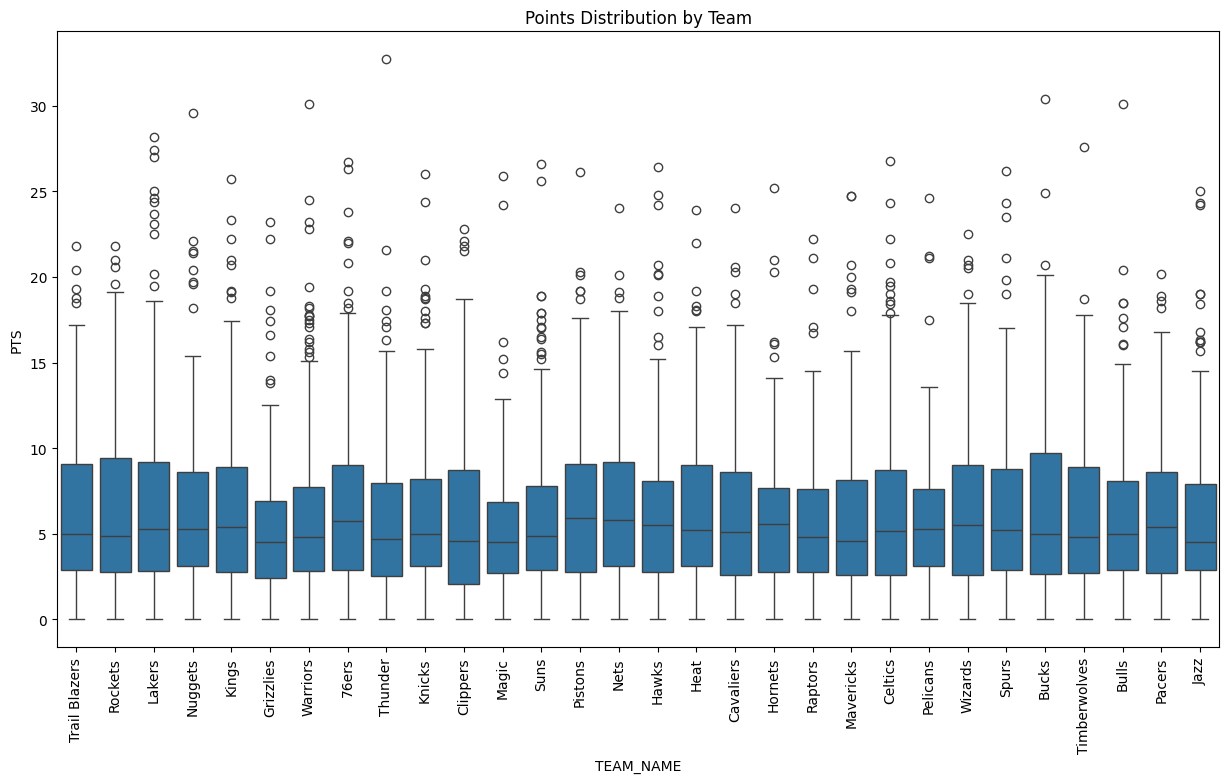

In [167]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=nba_df, x='TEAM_NAME', y='PTS')
plt.xticks(rotation=90)
plt.title('Points Distribution by Team')
plt.show()

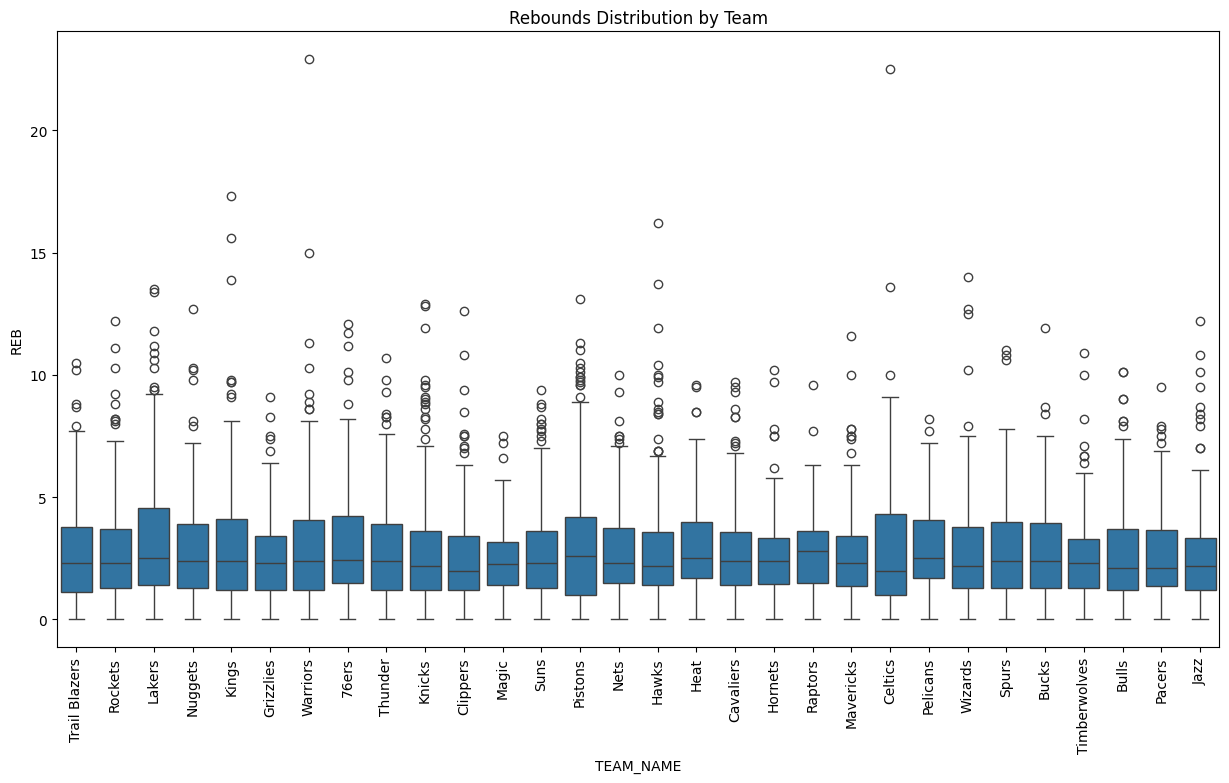

In [168]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=nba_df, x='TEAM_NAME', y='REB')
plt.xticks(rotation=90)
plt.title('Rebounds Distribution by Team')
plt.show()

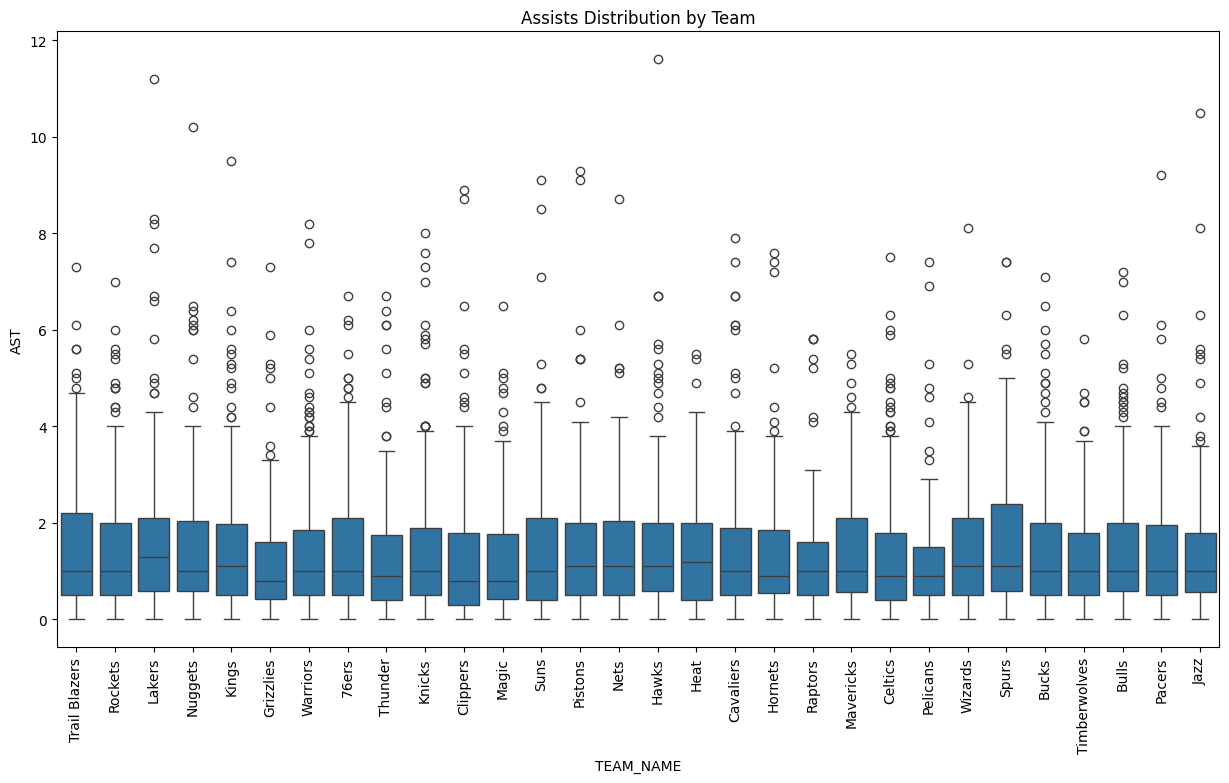

In [169]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=nba_df, x='TEAM_NAME', y='AST')
plt.xticks(rotation=90)
plt.title('Assists Distribution by Team')
plt.show()

Based on the plots above, we do have a number of outliers in the distribution of PTS, REB, and AST. But overall, PTS commonly range between 3 to 8, REB commmonly ranges from 0 to 5, and AST ranges from 0 to 3. Let's use summary statistics.

In [170]:
summary_stats = nba_df.groupby('TEAM_NAME')[['PTS', 'REB', 'AST']].agg(['mean', 'median', 'std', 'min', 'max'])
print(summary_stats)

                    PTS                                   REB         \
                   mean median       std  min   max      mean median   
TEAM_NAME                                                              
76ers          6.695370   5.75  5.116156  0.0  26.7  3.045370   2.45   
Bucks          6.656757   5.00  5.475178  0.0  30.4  2.880405   2.40   
Bulls          6.330872   5.00  4.814321  0.0  30.1  2.785235   2.10   
Cavaliers      6.268831   5.10  4.721783  0.0  24.0  2.804545   2.40   
Celtics        6.538785   5.15  5.209727  0.0  26.8  2.844393   2.00   
Clippers       5.939521   4.60  4.917242  0.0  22.8  2.549701   2.00   
Grizzlies      5.720175   4.55  4.554861  0.0  23.2  2.580702   2.30   
Hawks          6.193590   5.50  4.617405  0.0  26.4  2.846581   2.20   
Heat           6.882022   5.20  5.194874  0.0  23.9  2.975281   2.50   
Hornets        6.122222   5.60  4.663330  0.0  25.2  2.734343   2.40   
Jazz           6.175735   4.50  5.171038  0.0  25.0  2.811765   

Let's melt these down so we can display them in bar plots.

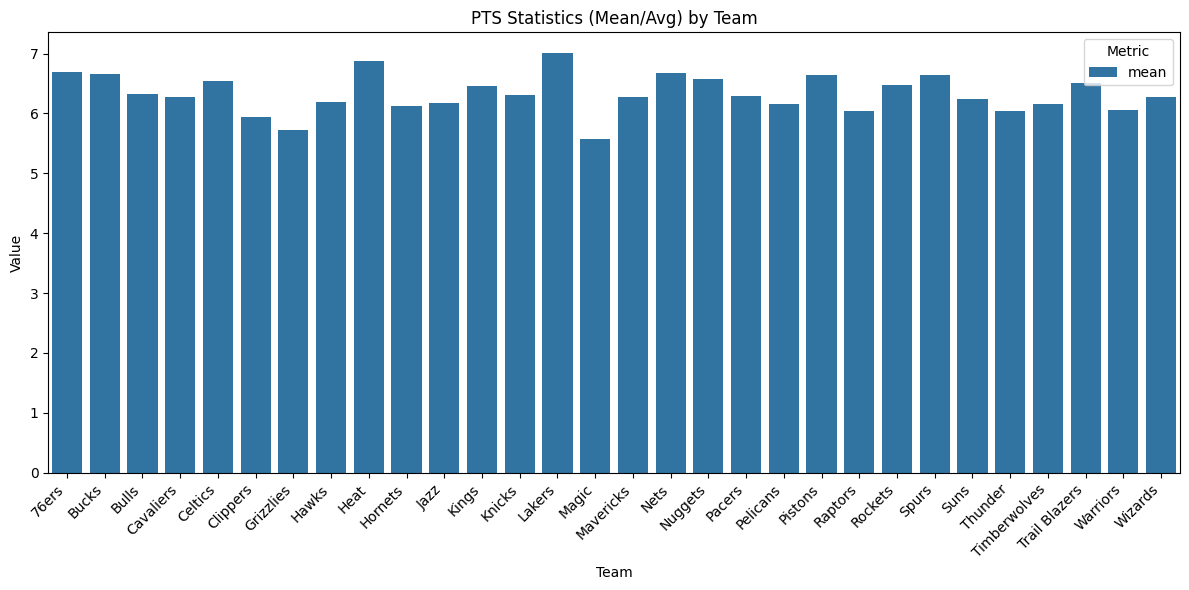

In [171]:
pts_stats = summary_stats['PTS'].reset_index()
pts_melted = pts_stats.melt(id_vars='TEAM_NAME', 
                           # value_vars=['mean', 'median', 'std'],
                           value_vars='mean',
                           var_name='Metric')
plt.figure(figsize=(12, 6))
sns.barplot(data=pts_melted, x='TEAM_NAME', y='value', hue='Metric')
plt.title('PTS Statistics (Mean/Avg) by Team')
plt.ylabel('Value')
plt.xlabel('Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

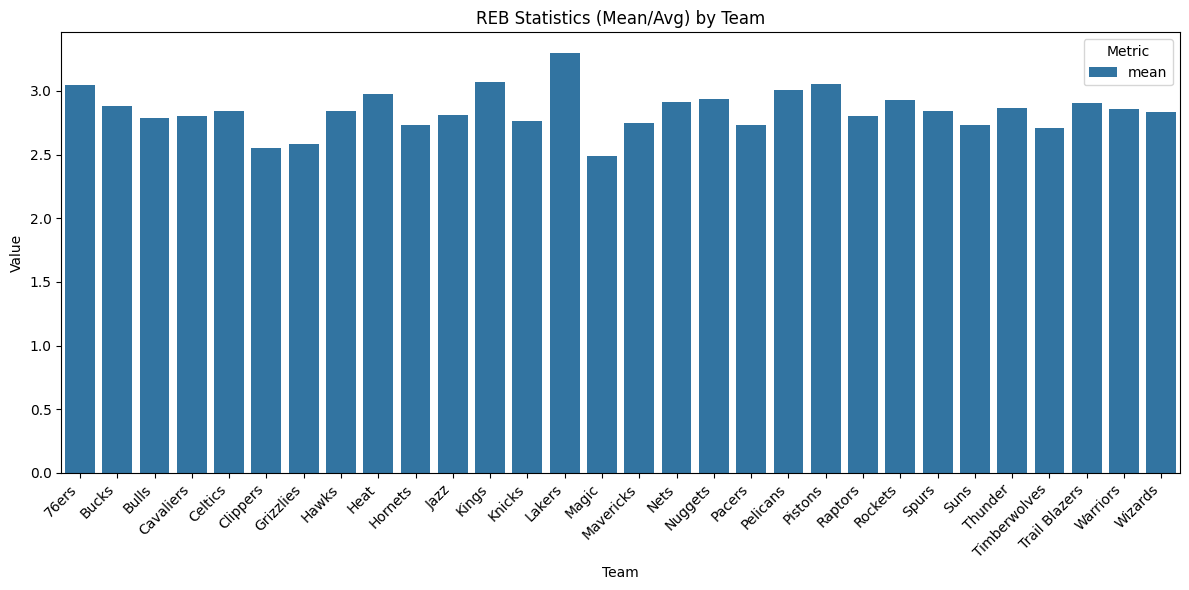

In [172]:
pts_stats = summary_stats['REB'].reset_index()
pts_melted = pts_stats.melt(id_vars='TEAM_NAME', 
                           # value_vars=['mean', 'median', 'std'],
                           value_vars='mean',
                           var_name='Metric')
plt.figure(figsize=(12, 6))
sns.barplot(data=pts_melted, x='TEAM_NAME', y='value', hue='Metric')
plt.title('REB Statistics (Mean/Avg) by Team')
plt.ylabel('Value')
plt.xlabel('Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

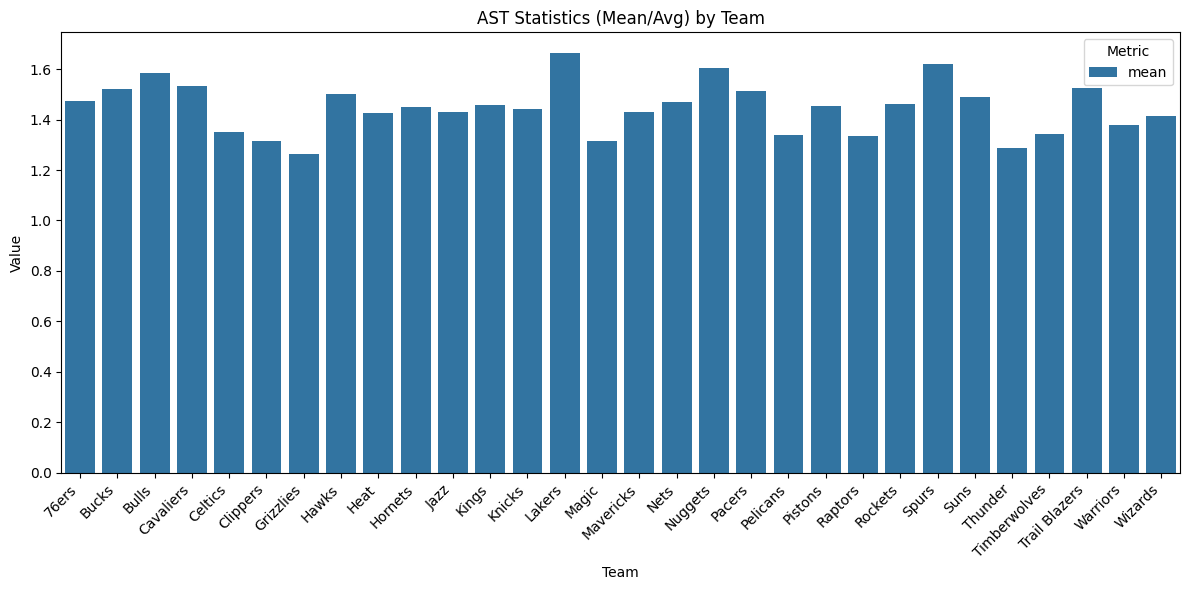

In [173]:
pts_stats = summary_stats['AST'].reset_index()
pts_melted = pts_stats.melt(id_vars='TEAM_NAME', 
                           # value_vars=['mean', 'median', 'std'],
                           value_vars='mean',
                           var_name='Metric')
plt.figure(figsize=(12, 6))
sns.barplot(data=pts_melted, x='TEAM_NAME', y='value', hue='Metric')
plt.title('AST Statistics (Mean/Avg) by Team')
plt.ylabel('Value')
plt.xlabel('Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

By the boxplots, we can see that `TEAM_NAME = Lakers` has the highest PTS mean, while `TEAM_NAME = Magic` has the lowest. `TEAM_NAME = Magic` have the lowest REB mean, while `TEAM_NAME = Lakers` have the highest REB mean. Finally, `TEAM_NAME = Grizzlies` have the lowest AST mean, while `TEAM_NAME = Lakers` have the highest AST mean. 

The data shows that Lakers and Magic are constantly the highest and the lowest, respectively. This shows these are teams with possibly the best and worst performances based on raw comparisons. They could be key teams to note for later. Even though Grizzlies have the lowest assists, Magic is still way under Lakers.

Next, we will check for correlation using a heatmap. 

According to the ydataprofiling report, we can already see the following:

from notifications:
- `DRAFT_NUMBER` is highly overall correlated with `DRAFT_ROUND`
- `DRAFT_ROUND` is highly overall correlated with `DRAFT_NUMBER`
- `PTS` is highly overall correlated with `AST` and `REB`
- `REB` is highly overall correlated with `PTS`	

from heatmap/correlations tab: (0 to 1.000)
- `DRAFT_ROUND` and `DRAFT_NUMBER`: 0.527
- `DRAFT_ROUND` and `PTS`: 0.303 <-- Notable among PTS/AST/REB and DRAFT*, moderate
- `DRAFT_ROUND` and `REB`: 0.246
- `DRAFT_ROUND` and `AST`: 0.181
- `DRAFT_NUMBER` and `PTS`: -0.035 <- Negative Correlation
- `DRAFT_NUMBER` and `REB`: -0.005 <- Negative Correlation, Lowest Correlation
- `DRAFT_NUMBER` AND `AST`: -0.024 <- Negative Correlation
- `PTS` and `REB`: 0.728
- `PTS` and `AST`: 0.755 <-- Highest Correlation
- `REB` and `AST`: 0.416

Furthermore, we have the following, but are unsure if ydataprofiling has used one hot encoding for `POSITION`:
- `DRAFT_ROUND` and `POSITION`: 0.116
- `DRAFT_NUMBER` and `POSITION`: 0.000 <-- notable for having no correlation at all.
- `PTS` and `POSITION`: 0.047
- `AST` and `POSITION`: 0.165
- `REB` and `POSITION`: 0.183 <-- weak but the highest among the variables and `POSITION`.


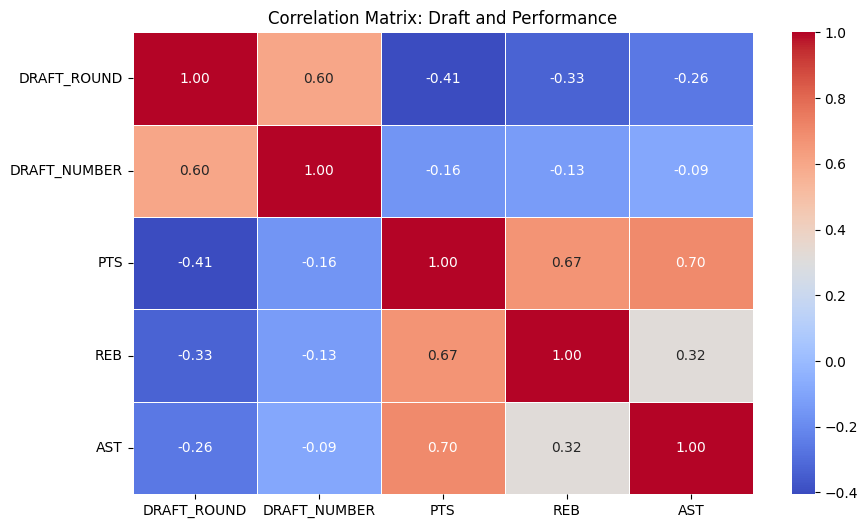

In [174]:
corr_cols = ['DRAFT_ROUND', 'DRAFT_NUMBER', 'PTS', 'REB', 'AST'] # leaving out POSITION bc its categorical
nba_df_corr = nba_df[corr_cols]
corr_matrix = nba_df_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Draft and Performance')
plt.show()

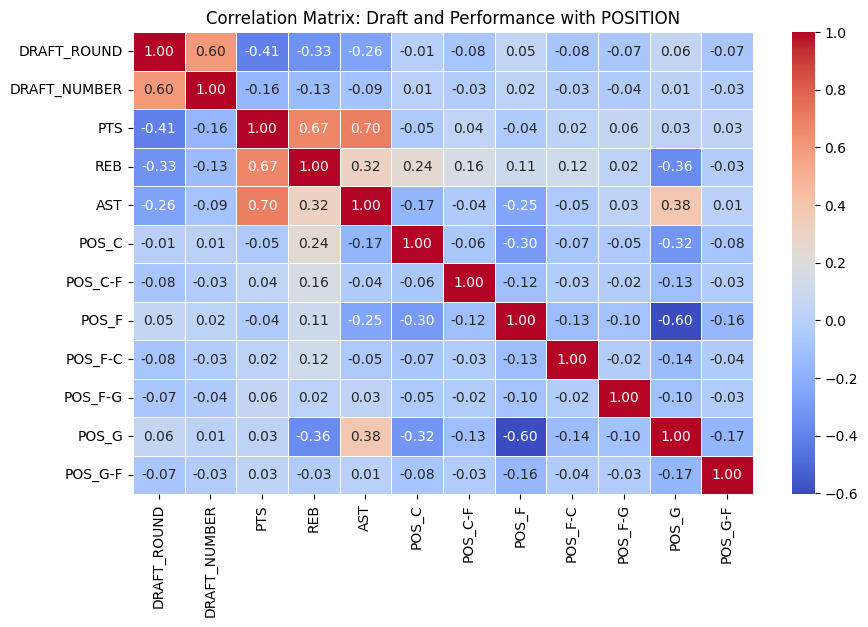

In [175]:
# for one hot encoding
position_dummies = pd.get_dummies(nba_df['POSITION'], prefix='POS')

corr_cols = ['DRAFT_ROUND', 'DRAFT_NUMBER', 'PTS', 'REB', 'AST']
nba_df_corr = pd.concat([nba_df[corr_cols], position_dummies], axis=1)
corr_matrix = nba_df_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Draft and Performance with POSITION')
plt.show()

The more we look into it, it seems that the variables for DRAFT_ROUND and DRAFT_NUMBER have low correlation with the performance metrics. 

Finally, we will conduct something simlar to the ANOVA test, ANCOVA (Analysis for Covariance) is able to work with both numerical and categorical variables.

In [176]:
def ancova(df, dependent_var):
    model = ols(f'{dependent_var} ~ C(TEAM_NAME) + C(POSITION) + DRAFT_ROUND + DRAFT_NUMBER', data=df).fit()
    anova_results = anova_lm(model, typ=2)
    return model, anova_results

performance_metrics = ['PTS', 'REB', 'AST']

for metric in performance_metrics:
    print(f"\n ---{metric} RESULTS ---")
    model, anova = ancova(nba_df, metric)
    
    print(anova)
    
    team_p_value = anova.loc['C(TEAM_NAME)', 'PR(>F)']
    if team_p_value < 0.05:
        print(f"\nTEAM EFFECT IS SIGNIFICANT (p = {team_p_value:.4f})")
        print("Certain teams DO have significantly different performance after controlling for position and draft capital")
    else:
        print(f"\nTeam effect is NOT significant (p = {team_p_value:.4f})")
        print("Teams do NOT differ significantly after controlling for position and draft capital")

def team_test(df, metric):
    model = ols(f'{metric} ~ C(TEAM_NAME) + C(POSITION) + DRAFT_ROUND + DRAFT_NUMBER', data=df).fit()
    p_val = anova_lm(model, typ=2).loc['C(TEAM_NAME)', 'PR(>F)']
    return p_val < 0.05, p_val

print("\n---SUMMARY---")
for metric in ['PTS', 'REB', 'AST']:
    significant, p_val = team_test(nba_df, metric)
    result = "YES" if significant else "NO" 
    print(f"{metric}: Team effects significant? {result} (p={p_val:.4f})")


 ---PTS RESULTS ---
                    sum_sq      df           F        PR(>F)
C(TEAM_NAME)    524.601153    29.0    0.842823  7.063992e-01
C(POSITION)     976.565197     6.0    7.583246  4.219081e-08
DRAFT_ROUND    4652.427223     1.0  216.762795  1.268440e-47
DRAFT_NUMBER   2346.380139     1.0  109.320983  3.289927e-25
Residual      73618.839444  3430.0         NaN           NaN

Team effect is NOT significant (p = 0.7064)
Teams do NOT differ significantly after controlling for position and draft capital

 ---REB RESULTS ---
                    sum_sq      df           F         PR(>F)
C(TEAM_NAME)    113.696252    29.0    1.075913   3.568724e-01
C(POSITION)    3259.648452     6.0  149.090033  1.562931e-168
DRAFT_ROUND     437.716810     1.0  120.121936   1.691370e-27
DRAFT_NUMBER    422.982484     1.0  116.078418   1.213720e-26
Residual      12498.705151  3430.0         NaN            NaN

Team effect is NOT significant (p = 0.3569)
Teams do NOT differ significantly after control

The ANCOVA results consistently show that team membership has no significant effect on player performance across all three key metrics:
- Points (PTS): p = 0.706
- Rebounds (REB): p = 0.357
- Assists (AST): p = 0.520

### 4.2 Answering the second question

How do performance metrics (PTS, REB, AST) vary by player position (POSITION)?
For this question to be answered, we will create a test for all three metrics using ANOVA.

Testing group means of `PTS`
* H0: There is no difference among the group means of `PTS`.
* Ha: There is at least one group that differs significantly among the group means of `PTS`.

Testing group means of `REB`
* H0: There is no difference among the group means of `REB`.
* Ha: There is at least one group that differs significantly among the group means of `REB`.

Testing group means of `AST`
* H0: There is no difference among the group means of `AST`.
* Ha: There is at least one group that differs significantly among the group means of `AST`.

In [177]:
# 2. How do performance metrics (PTS, REB, AST) vary by player position (POSITION),
# and are certain positions prioritized by specific teams (TEAM_NAME)?
# ^-- This will be measured via visualization using boxplots or bar charts, where the statistics are grouped by the position of a player.
# print(nba_df['POSITION'].unique()) # Positions 'F' 'C' 'G' 'F-G' 'C-F' 'F-C' 'G-F'
nba_pos_performance = nba_df[['POSITION', 'PTS', 'REB', 'AST']]
# print(nba_pos_performance)

nba_pos_f_performance = nba_pos_performance.query('POSITION == "F"')
nba_pos_c_performance = nba_pos_performance.query('POSITION == "C"')
nba_pos_g_performance = nba_pos_performance.query('POSITION == "G"')

nba_pos_fg_performance = nba_pos_performance.query('POSITION == "F-G"')
nba_pos_cf_performance = nba_pos_performance.query('POSITION == "C-F"')
nba_pos_fc_performance = nba_pos_performance.query('POSITION == "F-C"')
nba_pos_gf_performance = nba_pos_performance.query('POSITION == "G-F"')

alpha = 0.05

print("\nTesting group means of 'PTS':")
f_statistic, p_value = f_oneway(
    nba_pos_f_performance['PTS'],
    nba_pos_c_performance['PTS'],
    nba_pos_g_performance['PTS'],
    nba_pos_fg_performance['PTS'],
    nba_pos_cf_performance['PTS'],
    nba_pos_fc_performance['PTS'],
    nba_pos_gf_performance['PTS'],
)
print(f"F-statistic: {f_statistic}")
# print(f"P-value: {p_value}")
if (p_value < alpha):
    print("Reject the null hypothesis, there is a significant difference between the means")
else:
    print("Fail to reject the null hypothesis, there is no significance between the means")

print("\nTesting group means of 'REB':")
f_statistic, p_value = f_oneway(
    nba_pos_f_performance['REB'],
    nba_pos_c_performance['REB'],
    nba_pos_g_performance['REB'],
    nba_pos_fg_performance['REB'],
    nba_pos_cf_performance['REB'],
    nba_pos_fc_performance['REB'],
    nba_pos_gf_performance['REB'],
)

if (p_value < alpha):
    print("Reject the null hypothesis, there is a significant difference between the means")
else:
    print("Fail to reject the null hypothesis, there is no significance between the means")

print("\nTesting group means of 'AST':")
f_statistic, p_value = f_oneway(
    nba_pos_f_performance['AST'],
    nba_pos_c_performance['AST'],
    nba_pos_g_performance['AST'],
    nba_pos_fg_performance['AST'],
    nba_pos_cf_performance['AST'],
    nba_pos_fc_performance['AST'],
    nba_pos_gf_performance['AST'],
)

if (p_value < alpha):
    print("Reject the null hypothesis, there is a significant difference between the means")
else:
    print("Fail to reject the null hypothesis, there is no significance between the means")


Testing group means of 'PTS':
F-statistic: 7.501029314727636
Reject the null hypothesis, there is a significant difference between the means

Testing group means of 'REB':
Reject the null hypothesis, there is a significant difference between the means

Testing group means of 'AST':
Reject the null hypothesis, there is a significant difference between the means


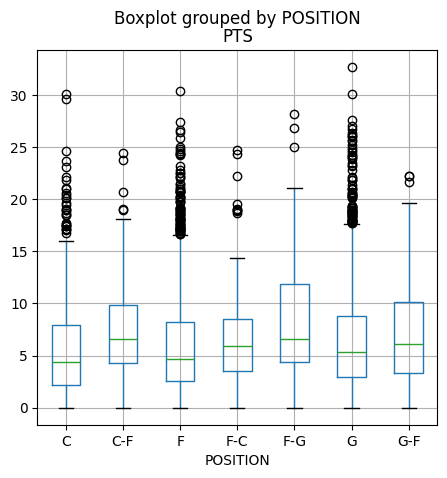

In [178]:
nba_pos_performance.boxplot('PTS', by = 'POSITION', figsize = (5, 5))
plt.show()

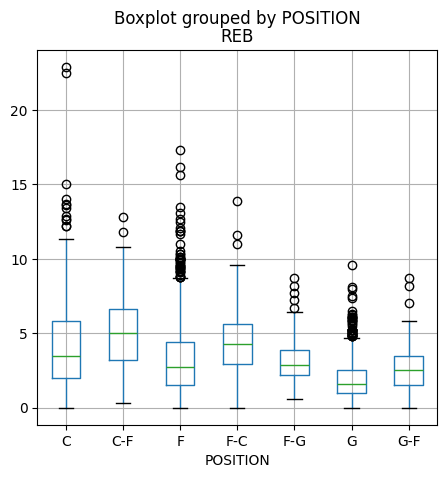

In [179]:
nba_pos_performance.boxplot('REB', by = 'POSITION', figsize = (5, 5))
plt.show()

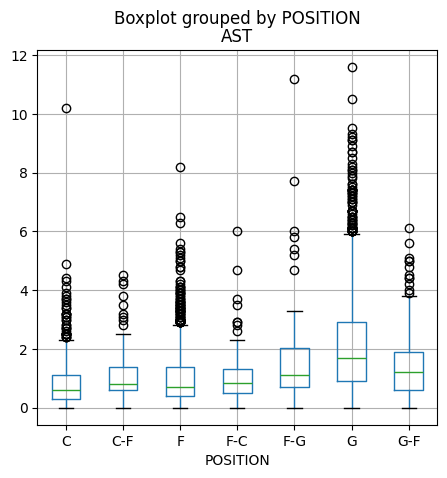

In [180]:
nba_pos_performance.boxplot('AST', by = 'POSITION', figsize = (5, 5))
plt.show()

Are these certain positions prioritized by specific teams (TEAM_NAME)? We will investigate it by seeing the amount of possitions of players by team.

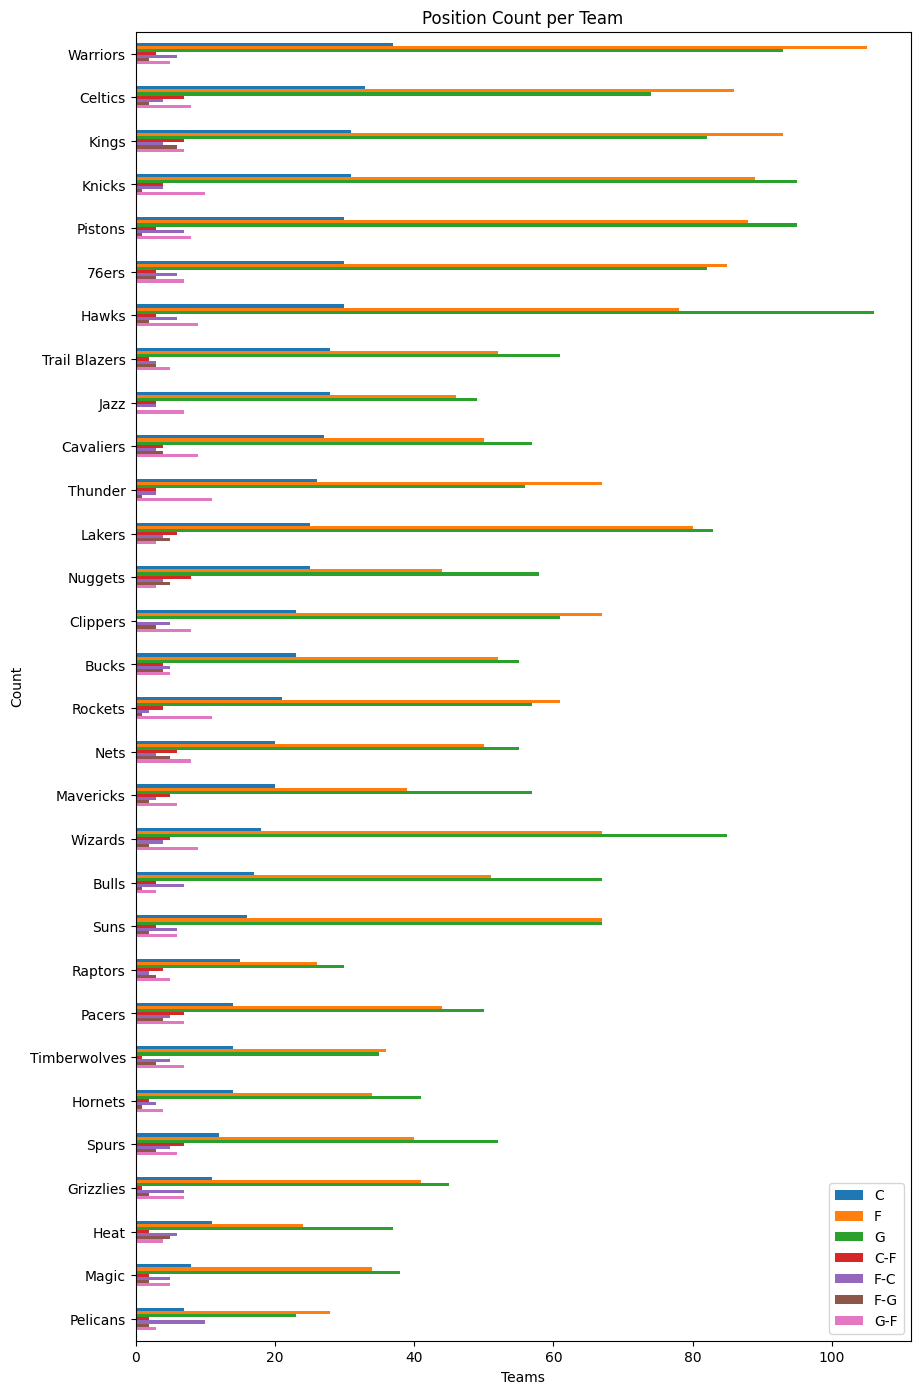

In [181]:
# print(nba_df['POSITION'].value_counts())
nba_drafted_df = nba_df[['TEAM_NAME', 'POSITION']]
# print(nba_drafted_df)

position_cols = pd.get_dummies(nba_drafted_df['POSITION'])
nba_drafted_df = nba_drafted_df.join(position_cols).drop('POSITION', axis=1)
nba_drafted_df = nba_drafted_df.groupby(['TEAM_NAME']).sum().sort_values(['C', 'F', 'G', 'C-F', 'F-C', 'F-G', 'G-F'], ascending=False)
nba_drafted_df = nba_drafted_df.iloc[:, [0, 2, 5, 1, 3, 4, 6]]

nba_drafted_df.plot.barh(figsize=(10,17)).invert_yaxis()
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Position Count per Team')
plt.show()

### 4.3 Answering the third question

The third research question examines whether players who change teams, as identified by multiple `PLAYER_NAME` entries with different `TEAM_NAME` values, exhibit statistically significant differences in their performance metrics—points (`PTS`), rebounds (`REB`), and assists (`AST`) before and after the team change. 

Hypotheses:
- H0: There is no significant difference in the mean performance metric before and after a team change.
- Ha: There is a significant difference in the mean performance metric before and after a team change.

First, let's identify players with multiple team affiliations and identify which of them switched teams.

In [182]:
duplicates = nba_df.groupby('PLAYER_NAME').filter(lambda x: len(x) > 1)
appearances = duplicates['PLAYER_NAME'].value_counts().reset_index()
appearances.columns = ['PLAYER_NAME', 'APPEARANCES']
print(appearances)

player_team_counts = duplicates.groupby('PLAYER_NAME')['TEAM_NAME'].nunique()
multi_team_players = player_team_counts[player_team_counts > 1].index

appearances = duplicates['PLAYER_NAME'].value_counts().reset_index()
appearances.columns = ['PLAYER_NAME', 'APPEARANCES']
print(appearances)

team_change_df = duplicates[duplicates['PLAYER_NAME'].isin(multi_team_players)]

         PLAYER_NAME  APPEARANCES
0      Charles Smith            3
1     George Johnson            3
2          Dee Brown            2
3      Charlie Davis            2
4         Mark Davis            2
5       Johnny Davis            2
6        Matt Guokas            2
7      Mike Dunleavy            2
8   Gerald Henderson            2
9         Mike James            2
10     Chris Johnson            2
11     Patrick Ewing            2
12     David Johnson            2
13     Eddie Johnson            2
14       Ken Johnson            2
15     Larry Johnson            2
16       Bobby Jones            2
17     Charles Jones            2
18      Willie Jones            2
19  Cedric Henderson            2
20       George King            2
21     Tony Mitchell            2
22         Glen Rice            2
23        Jim Paxson            2
24    Walker Russell            2
25        Bill Smith            2
26       Chris Smith            2
27        Greg Smith            2
28     Michael

We notice that some players switched teams more than once; however, since only 2 players have exactly 3 team changes, we will focus our analysis on players with a single switch.

In [183]:

#Sort by PLAYER_NAME and FROM_YEAR to select earliest and latest team entries
team_change_df = team_change_df.sort_values(['PLAYER_NAME', 'FROM_YEAR'])
team_change_pairs = pd.concat([team_change_df.groupby('PLAYER_NAME').head(1), team_change_df.groupby('PLAYER_NAME').tail(1)]).drop_duplicates()
team_change_pairs = team_change_pairs.groupby('PLAYER_NAME').filter(lambda x: len(x) == 2)

#Create separate DataFrames for 'before' and 'after' team change
before_df = team_change_pairs.groupby('PLAYER_NAME').first().reset_index()
after_df = team_change_pairs.groupby('PLAYER_NAME').last().reset_index()

#Combine into a paired DataFrame 
paired_df = pd.DataFrame({
    'PLAYER_NAME': before_df['PLAYER_NAME'],
    'PTS_before': before_df['PTS'], 'PTS_after': after_df['PTS'],
    'REB_before': before_df['REB'], 'REB_after': after_df['REB'],
    'AST_before': before_df['AST'], 'AST_after': after_df['AST']
})

Let's take a look at the visualizations to get a better understanding.

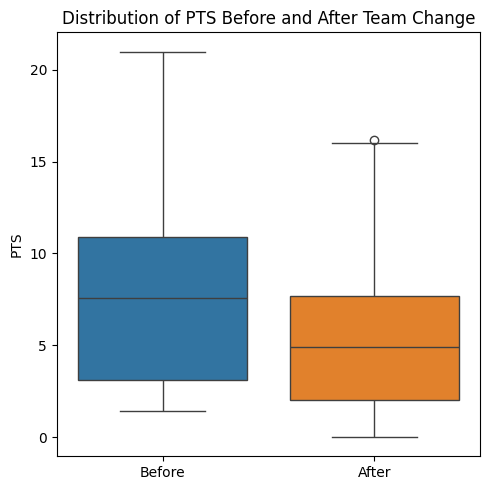

In [184]:
def plot_team_change_metric(metric, paired_df, figsize=(5, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.boxplot(data=[paired_df[f'{metric}_before'], paired_df[f'{metric}_after']], ax=ax)
    ax.set_xticks([0, 1])  
    ax.set_xticklabels(['Before', 'After']) 
    ax.set_title(f'Distribution of {metric} Before and After Team Change')
    ax.set_ylabel(metric)
    plt.tight_layout()
    plt.show()

plot_team_change_metric('PTS', paired_df)

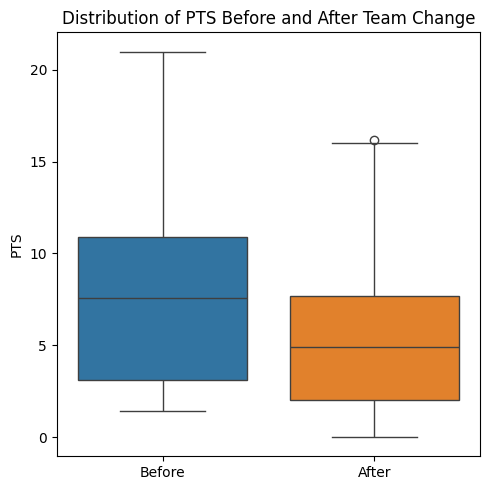

In [185]:
plot_team_change_metric('PTS', paired_df)

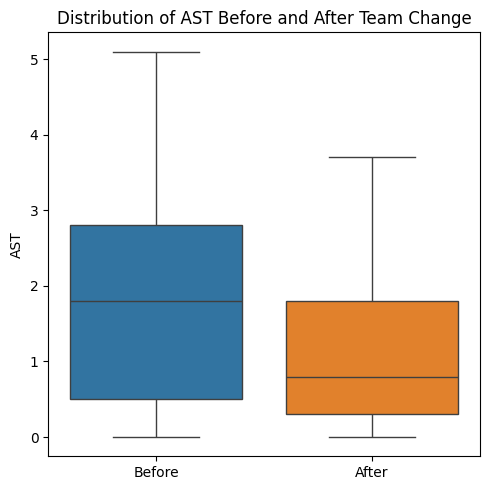

In [186]:
plot_team_change_metric('AST', paired_df)

For the statistical test, the normality of differences will first be checked using the Shapiro-Wilk test.

In [187]:
#Check normality of differences using Shapiro-Wilk test
def check_normality(data_before, data_after, metric):
    differences = data_after - data_before
    stat, p_value = shapiro(differences.dropna())
    print(f"Shapiro-Wilk Test for {metric} Differences: Statistic = {stat:.4f}, p-value = {p_value:.4f}")
    return p_value > 0.05

is_normal = check_normality(paired_df[f'{metric}_before'], paired_df[f'{metric}_after'], metric)
if is_normal:
    print("\nNow that we have confirmed that our data follows a normal distribution, we will proceed with our main test statistic.")

Shapiro-Wilk Test for AST Differences: Statistic = 0.9856, p-value = 0.9237

Now that we have confirmed that our data follows a normal distribution, we will proceed with our main test statistic.


In [188]:
alpha = 0.05
print("\nResults of Paired T-Tests for Performance Metrics:")
metrics = ['PTS', 'REB', 'AST']
for metric in metrics:
    print(f"\n--- {metric} Analysis ---")
    
    #Paired t-test
    stat, p_value = ttest_rel(paired_df[f'{metric}_before'].dropna(), paired_df[f'{metric}_after'].dropna())
    print(f"Paired T-Test for {metric}: t-statistic = {stat:.4f}, p-value = {p_value:.4f}")
    
    if p_value < alpha:
        print(f"Conclusion: Reject H0. There is a statistically significant difference in {metric} after a team change (p < 0.05).")
    else:
        print(f"Conclusion: Fail to reject H0. There is no statistically significant difference in {metric} after a team change (p ≥ 0.05).")


Results of Paired T-Tests for Performance Metrics:

--- PTS Analysis ---
Paired T-Test for PTS: t-statistic = 1.8367, p-value = 0.0753
Conclusion: Fail to reject H0. There is no statistically significant difference in PTS after a team change (p ≥ 0.05).

--- REB Analysis ---
Paired T-Test for REB: t-statistic = 0.8547, p-value = 0.3989
Conclusion: Fail to reject H0. There is no statistically significant difference in REB after a team change (p ≥ 0.05).

--- AST Analysis ---
Paired T-Test for AST: t-statistic = 2.5870, p-value = 0.0143
Conclusion: Reject H0. There is a statistically significant difference in AST after a team change (p < 0.05).


In [189]:
# Summary of results
print("\n--- Summary of Team Change Effects ---")
for metric in metrics:
    stat, p_value = ttest_rel(paired_df[f'{metric}_before'].dropna(), paired_df[f'{metric}_after'].dropna())
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"{metric}: Effect of Team Change = {significance} (p = {p_value:.4f})")


--- Summary of Team Change Effects ---
PTS: Effect of Team Change = Not Significant (p = 0.0753)
REB: Effect of Team Change = Not Significant (p = 0.3989)
AST: Effect of Team Change = Significant (p = 0.0143)


### Insights from EDA
For the first question, "Do certain teams (TEAM_NAME) have significantly higher player performance (PTS, REB, AST) after controlling for position (POSITION) and draft capital (DRAFT_ROUND/NUMBER)?", DRAFT_ROUND/NUMBER are not correlated with the performance metrics and `POSITION`, but we did find that teams like Lakers have higher performance metrics. The results of the ANCOVA test show that team membership does not have a significant effect on player performance. 

The correlation tests show that there are strong positive relationships between the performance metrics, suggesting that high-performing players tend to excel across multiple categories instead of just one area. `POSITION` has weak correlations with all variables but rebounds have the strongest relationship with this variable. `DRAFT_NUMBER` and `POSITION` having 0 correlation indicates that they are independent of each other. Interestingly enough, `PTS` and `POSITION` have a near 0 correlation, suggesting that the number of points scored has nothing to do with `POSITION`. Perhaps, it is that the work actually comes from teamwork. Overall, the correlation analysis reveals that player performance metrics are highly interconnected, DRAFT_ROUND has more predictive value than `DRAFT_NUMBER`, and `POSITION` plays a relatively minor role in determining statistical output. This supports the ANCOVA findings that individual talent matters more than positional influence on the teams.

This may propose that another question should be better.

---

For the question "How do performance metrics (PTS, REB, AST) vary by player position (POSITION), and are certain positions prioritized by specific teams (TEAM_NAME)?", it was broken down into two steps. We first check if the metrics vary by player position by testing each performance metric using the ANOVA one-tailed test. We fail to reject the null hypothesis for the stats `REB` and `AST`, however, the `PTS` stat resulted in a significant difference between the means of `POSITION`. For the second half of the question, we formed a graph to observe the data. We can see that positions `F` and `G` is ovewhelming priority of the team. It is followed by position 'C', then followed by the other positions.


---
For the question "Do players who change teams show significant differences in performance (PTS, REB, AST) before/after moving?", paired t-tests were conducted. `POINTS` showed no significant effect of team change (t=1.8367, p=0.0753), nor did `REBOUNDS` (t=0.8547, p=0.3989), suggesting these metrics depend more on individual skill than team context. `ASSISTS`, however, showed a significant effect (t=2.5870, p=0.0143), indicating team changes influence playmaking, likely due to role or dynamic shifts. Boxplots indicated a slight performance range decline post-switch, with some higher medians and outliers in PTS and REB showing rare boosts.

### Conclusion
The exploratory data analysis of NBA player performance metrics reveals that individual talent is the primary driver of performance outcomes, with team membership and position playing secondary roles. Key findings include:

Team Influence: While teams like the Lakers exhibit higher performance metrics (points, rebounds, assists), ANCOVA tests indicate that team membership does not significantly affect performance after controlling for position and draft capital. This suggests that elevated team metrics are likely due to the presence of highly talented players rather than the team itself enhancing performance.

Performance Metrics and Position: Correlation analyses show strong positive relationships among performance metrics, indicating that high-performing players excel across multiple areas. Position has weak correlations with most metrics, except for a moderate link with rebounds. However, ANOVA tests reveal significant differences in points across positions, suggesting that while position may not linearly predict performance, it does influence scoring averages. Teams prioritize forwards (F) and guards (G) over centers (C) and other positions, reflecting strategic preferences.

Impact of Team Changes: Paired t-tests demonstrate that team changes do not significantly alter points or rebounds, reinforcing their dependence on individual skill. In contrast, assists show a significant change post-switch, likely due to shifts in team dynamics or player roles, highlighting the team-dependent nature of playmaking.

For future analysis, the following questions can be studied:
1. Do players with longer careers (TO_YEAR - FROM_YEAR) exhibit more balanced contributions (similar z-scores for PTS, REB, AST) compared to short-tenured players? <-- This can bemeasured by calculating career span and balance score (e.g., variance across stat z-scores),also by checking correlation between career length and balance score.
2. Is there a relationship between the number of teams a player has (count TEAM_NAME) and their performance consistency (standard deviation of PTS/REB/AST over years)? <-- This can be measured by comparing stat variability vs. team changes (via scatterplots, Pearson's correlation, etc.)

## Section 5: Phase 2
Based on the findings in phase 1, individual talent is the primary driver of NBA player performance, not `team` or `positional` factors. Performance metrics (`PTS`, `REB`, `AST`) are strongly correlated, meaning that elite players excel across multiple areas rather than specializing. While teams like the Lakers show higher overall stats, this reflects talented rosters rather than team-driven performance enhancement. `POSITION` has minimal impact on most metrics, though forwards and guards are strategically prioritized by teams over centers. Team changes don't affect individual skills like scoring (PTS) or rebounding (REB), but significantly impact assists due to shifting team dynamics and player roles. The analysis suggests that player evaluation should focus on individual talent assessment rather than contextual factors, with playmaking ability being the most team-dependent skill.

### 5.1 Data Mining 
For this section, we will be using the K-means algorithm. Using K-means will directly reveal the natural player archetypes (or natural groupings of players) based on the performance metrics (PTS, REB, AST), which aligns with our key finding about individual talent being the primary driver. We initially considered association rule mining, but our insights from the EDA are about continuous performance relationships and player profiles, making clustering more appropriate for identifying patterns in numerical performance data.

Reiterating our research question: **"How do team context (franchise, roster stability), player role (position), and career trajectory (draft history, tenure) influence individual NBA player performance (PTS, REB, AST)?"**, K-means will allow us to create player performance profiles that can then be systematically analyzed against these contextual factors. By first clustering players based purely on their statistical output, we can then examine how these performance archetypes distribute across different teams, positions, and career backgrounds. This approach will quantify whether high-performance clusters are randomly distributed or if certain contextual factors consistently produce superior player profiles, directly testing our hypothesis that individual talent matters more than environmental influences.


#### 5.1.1 Data Preprocessing for K-Means Algorithm
K-means ([Link](https://codinginfinite.com/knn-vs-kmeans-similarities-and-differences/)) is an unsupervised machine learning algorithm which partitions data into `k` clusters by minimizing within-cluster variance. The algorithm iteratively assigns data points to the nearest centroid and updates centroids based on cluster means until convergence. **It requires standardized features since it uses Euclidean distance calculations.** 

Without standardization, variables with larger scales (like `PTS`) would dominate the clustering process. This would create misleading clusters where players are grouped primarily by scoring ability, ignoring their rebounding and assist contributions. Since our EDA revealed that "high-performing players tend to excel across multiple categories," we need equal weighting of all three metrics to accurately identify player archetypes. `StandardScaler` ensures each performance dimension contributes equally to the clustering algorithm, allowing us to discover balanced player profiles rather than score-dominated groupings.

We will be standardizing `PTS`, `REB`, and `AST` to have `mean=0` and `standard deviation=1`. (This is what StandardScaler does)

First, let's get an overview of our dataset after the EDA and data cleaning again.

In [190]:
display(nba_df.head())
print(nba_df.info())
print("\n\n\n")
print(nba_df.describe())

,PLAYER_NAME,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,Alaa Abdelnaby,Portland,Trail Blazers,POR,30,F,82.0,240.0,Duke,USA,1990.0,1.0,25.0,0.0,5.7,3.3,0.3,Career,1990,1994
1,Zaid Abdul-Aziz,Houston,Rockets,HOU,54,C,81.0,235.0,Iowa State,USA,1968.0,1.0,5.0,0.0,9.0,8.0,1.2,Career,1968,1977
2,Kareem Abdul-Jabbar,Los Angeles,Lakers,LAL,33,C,86.0,225.0,UCLA,USA,1969.0,1.0,1.0,0.0,24.6,11.2,3.6,Career,1969,1988
3,Mahmoud Abdul-Rauf,Denver,Nuggets,DEN,1,G,73.0,162.0,Louisiana State,USA,1990.0,1.0,3.0,0.0,14.6,1.9,3.5,Career,1990,2000
4,Tariq Abdul-Wahad,Sacramento,Kings,SAC,9,F-G,78.0,235.0,San Jose State,France,1997.0,1.0,11.0,0.0,7.8,3.3,1.1,Career,1997,2003


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745 entries, 0 to 4744
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_NAME        4745 non-null   object 
 1   TEAM_CITY          4745 non-null   object 
 2   TEAM_NAME          4745 non-null   object 
 3   TEAM_ABBREVIATION  4745 non-null   object 
 4   JERSEY_NUMBER      4745 non-null   int64  
 5   POSITION           4745 non-null   object 
 6   HEIGHT             4745 non-null   float64
 7   WEIGHT             4745 non-null   float64
 8   COLLEGE            4745 non-null   object 
 9   COUNTRY            4745 non-null   object 
 10  DRAFT_YEAR         3616 non-null   float64
 11  DRAFT_ROUND        3468 non-null   float64
 12  DRAFT_NUMBER       4745 non-null   float64
 13  ROSTER_STATUS      4745 non-null   float64
 14  PTS                4745 non-null   float64
 15  REB                4745 non-null   float64
 16  AST                4745 

In [191]:
# imports for KMeans, move this up later
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

We'll select the columns related to performance, then copy them into `data_for_clustering`. That's what we'll use for the KMeans algorithm.

In [192]:
performance_cols = ['PTS', 'REB', 'AST']
data_for_clustering = nba_df[performance_cols].copy()

print(data_for_clustering.isnull().sum()) # checked for null in case
# if nan: data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)

PTS    0
REB    0
AST    0
dtype: int64


Then we'll initialize a StandardScaler object and use that on the columns for performance ratings.

In [193]:
stdscaler = StandardScaler()
scaled_data = stdscaler.fit_transform(data_for_clustering)

Let's see the before and after scaling. 

C:\Users\gicac\AppData\Local\Temp\ipykernel_9076\3752548220.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_for_clustering['PTS'], data_for_clustering['REB'], data_for_clustering['AST']], labels=['PTS', 'REB', 'AST'])
C:\Users\gicac\AppData\Local\Temp\ipykernel_9076\3752548220.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2]], labels=['PTS', 'REB', 'AST'])


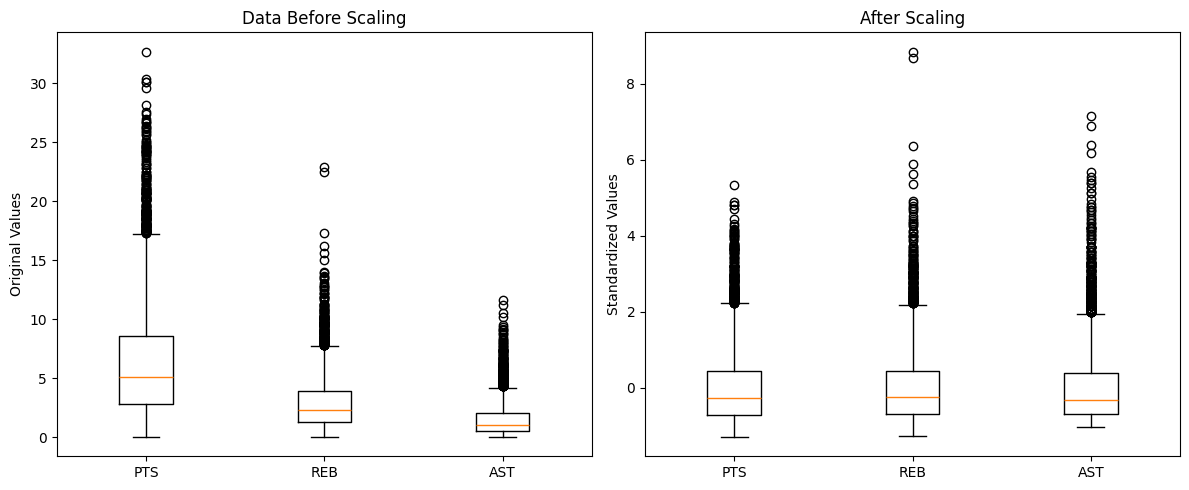

In [194]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Data Before Scaling")
plt.boxplot([data_for_clustering['PTS'], data_for_clustering['REB'], data_for_clustering['AST']], labels=['PTS', 'REB', 'AST'])
plt.ylabel("Original Values")

plt.subplot(1, 2, 2)
plt.title("After Scaling")
plt.boxplot([scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2]], labels=['PTS', 'REB', 'AST'])
plt.ylabel("Standardized Values")

plt.tight_layout()
plt.show()

It's more balanced now, although there are still outliers (which may affect clustering), this may be important to keep because we're working with sports data. These may show that there are some players who are more exceptional or unique in terms of performance.

#### 5.1.2 Implementing Data Mining Techniques - KMeans

In order to find the optimal k and justify it, we will use the Elbow method via the `kneed` library. The elbow method identifies the point where the rate of inertia (within-cluster variance) decrease sharply diminishes. According to this [source](https://datarecipes.substack.com/p/automating-cluster-selection-for) on automating selection of clusters, It plots the explained variance as a function of the number of clusters, and we're supposed to pick the "elbow" of that graph and that will serve as the optimal `k` or number of clusters to use.

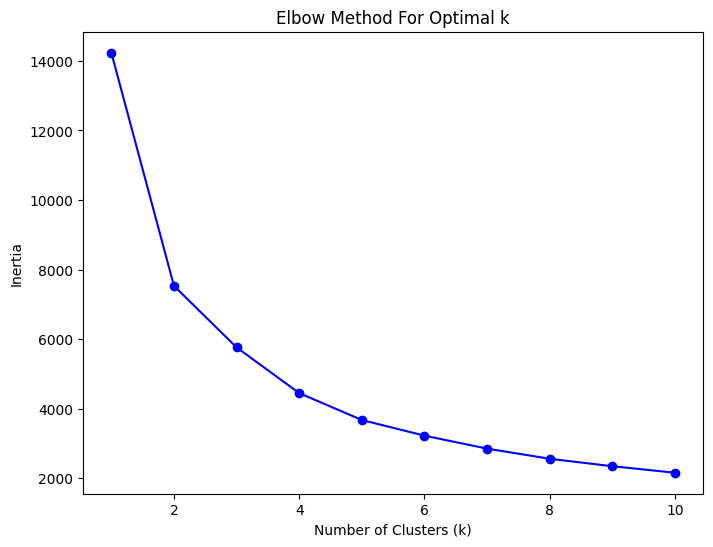

optimal k = 3


In [195]:
inertia = []
K = range(1, 11) # includes 1, excludes 11 so range is 1-10
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# plot it here
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# after we got the intertia, we can use kneelocator to find the optimal k
kneedle = KneeLocator(K, inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f"optimal k = {optimal_k}")

(Color Palette from https://seaborn.pydata.org/tutorial/color_palettes.html)

Now that we have scaled the data using StandardScaler, found the optimal k with kneed and KneeLocator, we can now use the KMeans algorithm on it.
- We'll use `optimal_k` for `n_clusters`
- `init` is `k-means++` (default) According to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) this "selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence." We'll use this default so it's quicker.
- `random_state=42` is an arbitrary number, apparently it's a [common convention](https://medium.com/@kriti-b/the-story-behind-random-state-42-85646a2da6e6). `random_state` ensures reproducability, kind of like a seed.
- `n_init=10` means it will run the algorithm 10 times and choose the best result (with lowest intertia)

In [196]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
nba_df['Cluster'] = kmeans.fit_predict(scaled_data)

# analyzing the cluster centers
cluster_centers = stdscaler.inverse_transform(kmeans.cluster_centers_) # inverse transform back to original scale
cluster_summary = pd.DataFrame(cluster_centers, columns=performance_cols) # turn the cluster centers into a dataframe
print("Summary: Cluster Centers (Player Archetypes):")
print(cluster_summary)

Summary: Cluster Centers (Player Archetypes):
         PTS       REB       AST
0   3.771003  1.789906  0.863386
1  10.629326  6.061036  1.644767
2  13.369831  3.448983  4.326780


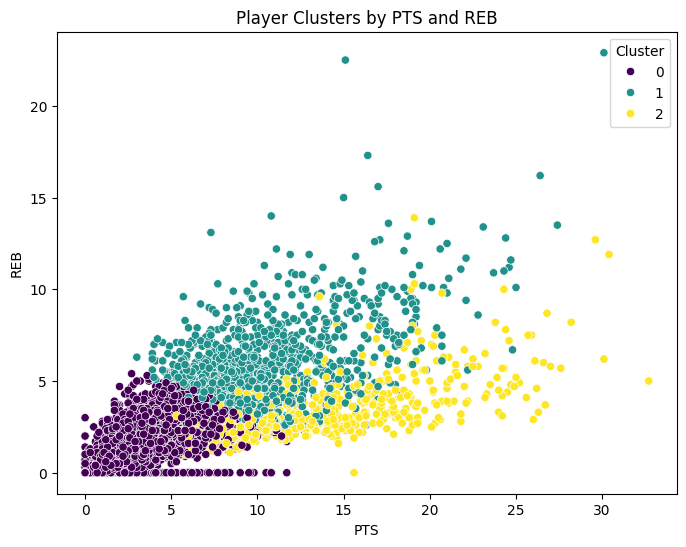

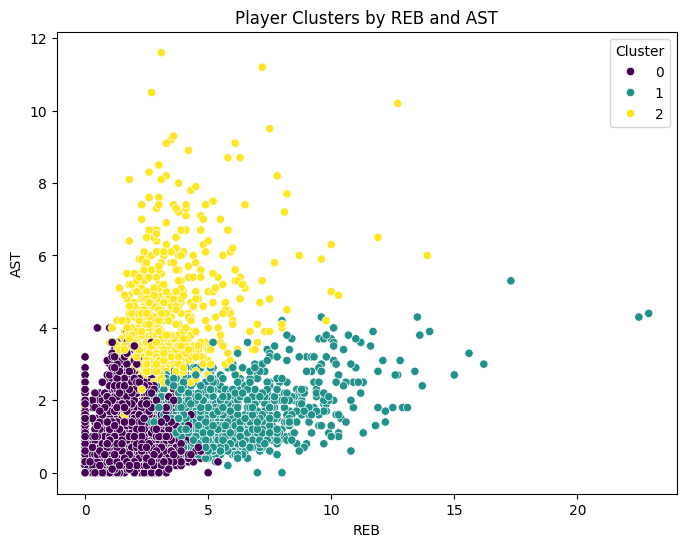

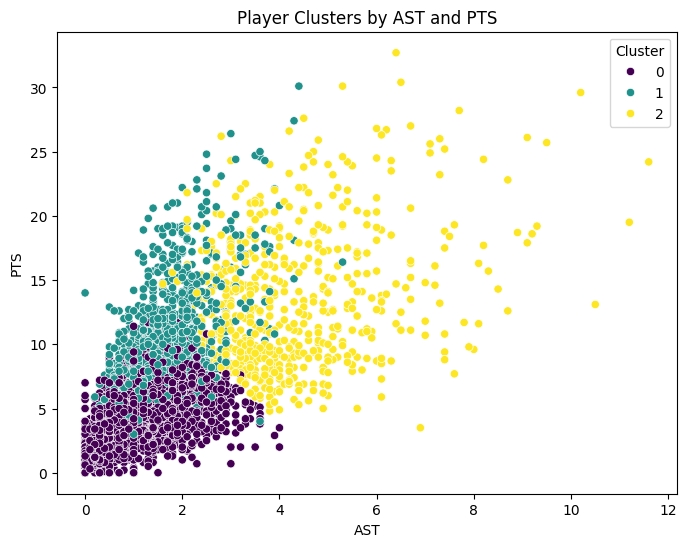

In [197]:
# plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba_df, x='PTS', y='REB', hue='Cluster', palette='viridis')
plt.title('Player Clusters by PTS and REB')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba_df, x='REB', y='AST', hue='Cluster', palette='viridis')
plt.title('Player Clusters by REB and AST')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=nba_df, x='AST', y='PTS', hue='Cluster', palette='viridis')
plt.title('Player Clusters by AST and PTS')
plt.show()
plt.show()

In [198]:
nba_df.info()
display(nba_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745 entries, 0 to 4744
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_NAME        4745 non-null   object 
 1   TEAM_CITY          4745 non-null   object 
 2   TEAM_NAME          4745 non-null   object 
 3   TEAM_ABBREVIATION  4745 non-null   object 
 4   JERSEY_NUMBER      4745 non-null   int64  
 5   POSITION           4745 non-null   object 
 6   HEIGHT             4745 non-null   float64
 7   WEIGHT             4745 non-null   float64
 8   COLLEGE            4745 non-null   object 
 9   COUNTRY            4745 non-null   object 
 10  DRAFT_YEAR         3616 non-null   float64
 11  DRAFT_ROUND        3468 non-null   float64
 12  DRAFT_NUMBER       4745 non-null   float64
 13  ROSTER_STATUS      4745 non-null   float64
 14  PTS                4745 non-null   float64
 15  REB                4745 non-null   float64
 16  AST                4745 

,PLAYER_NAME,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,COLLEGE,COUNTRY,...,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR,Cluster
0,Alaa Abdelnaby,Portland,Trail Blazers,POR,30,F,82.0,240.0,Duke,USA,...,1.0,25.0,0.0,5.7,3.3,0.3,Career,1990,1994,0
1,Zaid Abdul-Aziz,Houston,Rockets,HOU,54,C,81.0,235.0,Iowa State,USA,...,1.0,5.0,0.0,9.0,8.0,1.2,Career,1968,1977,1
2,Kareem Abdul-Jabbar,Los Angeles,Lakers,LAL,33,C,86.0,225.0,UCLA,USA,...,1.0,1.0,0.0,24.6,11.2,3.6,Career,1969,1988,1
3,Mahmoud Abdul-Rauf,Denver,Nuggets,DEN,1,G,73.0,162.0,Louisiana State,USA,...,1.0,3.0,0.0,14.6,1.9,3.5,Career,1990,2000,2
4,Tariq Abdul-Wahad,Sacramento,Kings,SAC,9,F-G,78.0,235.0,San Jose State,France,...,1.0,11.0,0.0,7.8,3.3,1.1,Career,1997,2003,0


There's now a `Cluster` column present in our `nba_df`. The players have been clustered into Cluster 0, 1, or 2. We will now be using this column to connect the performances to their context. we'll be using `DRAFT_ROUND` and `DRAFT_NUMBER` and `POSITION` to connect our data mining results directly back to our research question.

In [199]:
# --- analysis for distribution of positions within each cluster ---
position_distribution = pd.crosstab(nba_df['Cluster'], nba_df['POSITION'])
print("POSITION Distribution Across CLUSTER:")
print(position_distribution)

print("--------------------")

# --- analyze average draft round for each cluster ---
drafted_plr_df = nba_df[(nba_df['DRAFT_ROUND'] != 0)]
drafted_plr_grouped_df = drafted_plr_df.groupby(['Cluster', 'DRAFT_ROUND'])

# analyze the number of drafted players per cluster
draft_count = drafted_plr_grouped_df[['DRAFT_NUMBER']].count()
print("Player Draft COUNTS by CLUSTER and DRAFT_ROUND:")
print(draft_count)

print("--------------------")

# analyze the average draft round for each cluster
draft_distribution = drafted_plr_grouped_df[['DRAFT_NUMBER']].mean()
print("AVERAGE/MEAN DRAFT_NUMBER Distribution Across Player CLUSTER and DRAFT_ROUND:")
print(draft_distribution)

print("--------------------")

POSITION Distribution Across CLUSTER:
POSITION    C  C-F     F  F-C  F-G     G  G-F
Cluster                                      
0         410   46  1181   76   53  1290  133
1         231   65   483   62   17    73   35
2           4    3    60    2   10   483   28
--------------------
Player Draft COUNTS by CLUSTER and DRAFT_ROUND:
                     DRAFT_NUMBER
Cluster DRAFT_ROUND              
0       1.0                   654
        2.0                  1426
1       1.0                   584
        2.0                   267
2       1.0                   373
        2.0                   154
--------------------
AVERAGE/MEAN DRAFT_NUMBER Distribution Across Player CLUSTER and DRAFT_ROUND:
                     DRAFT_NUMBER
Cluster DRAFT_ROUND              
0       1.0             16.740061
        2.0             50.366059
1       1.0             10.368151
        2.0             36.951311
2       1.0             10.613941
        2.0             44.545455
--------------------

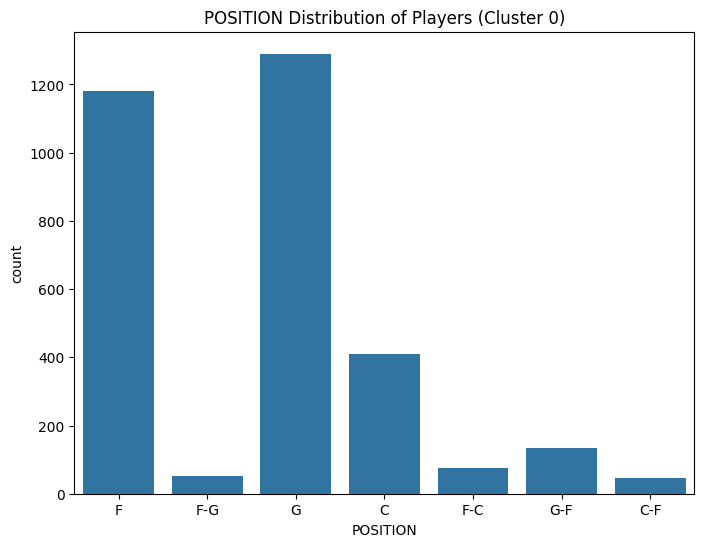

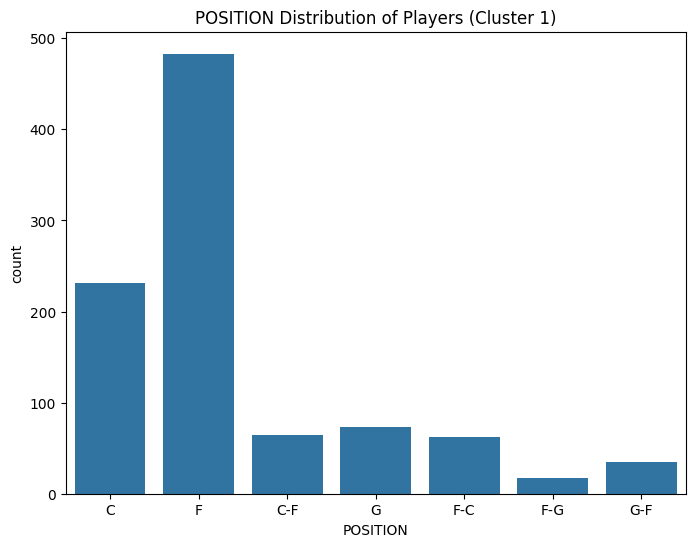

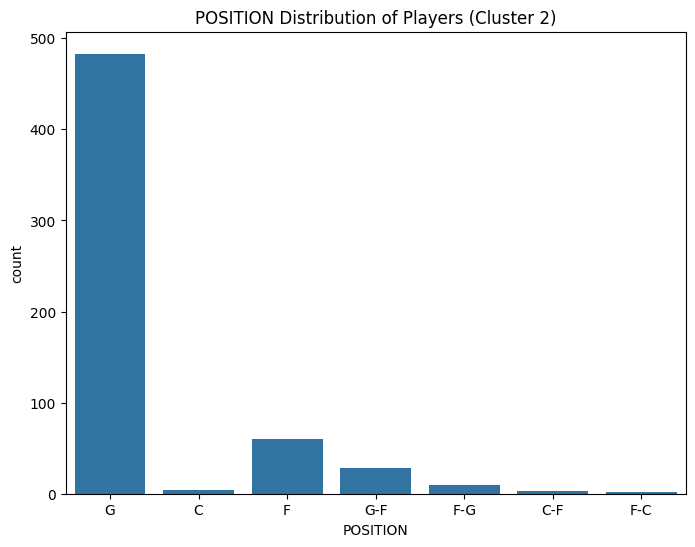

In [200]:
# --- plotting the distribution of positions for all three clusters ---
for cluster_id in [0, 1, 2]:
    cluster_df = nba_df[nba_df['Cluster'] == cluster_id]
    plt.figure(figsize=(8, 6))
    sns.countplot(data=cluster_df, x='POSITION')
    plt.title(f'POSITION Distribution of Players (Cluster {cluster_id})')
    plt.show()

#### 5.1.3 Insights and Conclusion from Data Mining

##### Cluster Summary
```txt
Cluster Centers (Player Archetypes):
         PTS       REB       AST
0   3.771003  1.789906  0.863386
1  10.629326  6.061036  1.644767
2  13.369831  3.448983  4.326780

POSITION Distribution Across CLUSTER:
POSITION    C  C-F     F  F-C  F-G     G  G-F
Cluster                                      
0         410   46  1181   76   53  1290  133
1         231   65   483   62   17    73   35
2           4    3    60    2   10   483   28
--------------------
Player Draft COUNTS by CLUSTER and DRAFT_ROUND:
                     DRAFT_NUMBER
Cluster DRAFT_ROUND              
0       1.0                   654
        2.0                  1426
1       1.0                   584
        2.0                   267
2       1.0                   373
        2.0                   154
--------------------
AVERAGE/MEAN DRAFT_NUMBER Distribution Across Player CLUSTER and DRAFT_ROUND:
                     DRAFT_NUMBER
Cluster DRAFT_ROUND              
0       1.0             16.740061
        2.0             50.366059
1       1.0             10.368151
        2.0             36.951311
2       1.0             10.613941
        2.0             44.545455
--------------------
```
##### Insights
From what we can analyze after data mining, we have noted the following centroid characteristics:  

Cluster 0: Role/Common Forwards and Guards
- Context: a "role player" aren't star players (very good).
- This is the largest and most diverse group, showing a significant number of players in every position.
- POSITION: Highest number of `POSITION=G` (Guards) and `POSITION=F` (Forwards) across all clusters.
- DRAFT_ROUND: The players in this cluster have a higher count and mean/average in `DRAFT_ROUND=2` (More players were drafted in round 2).
- DRAFT_NUMBER: Has the highest average `DRAFT_NUMBER` in both `DRAFT_ROUND=1` and `DRAFT_ROUND=2` across all clusters.
- PERFORMANCE: Cluster centers/centroids also show they have the lowest average `PTS`, `REB`, and `AST` across all clusters. Within this cluster, `PTS` is the highest.
    - lowest average statistics across all clusters.

Cluster 1: Average Forwards and Center Players
- Contains average performing players that have more `REB` than `AST` by average.
- POSITION: Most players here have `POSITION=F` (Forwards) followed by `POSITION=C` (Centers)
- DRAFT_ROUND: Within this cluster, more players were drafted in `DRAFT_ROUND=1`.
- DRAFT_NUMBER: Has the lowest average `DRAFT_NUMBER` in `DRAFT_ROUND=1` across all clusters. Contains an average in the middle for `DRAFT_ROUND=2` across all clusters.
- PERFORMANCE: Cluster centers summary show they have the middle average `PTS` and `AST` across all clusters and highest `REB`, but `PTS` are also the highest for this cluster.

Cluster 2: High Performing Guards
- The best performing players that has more `AST` than `REB` by average within the cluster, but has the highest `PTS` across all.
- POSITION: Most players here have `POSITION=G` (Guards) followed by `POSITION=F` (Forwards)
- POSITION: Important to note that there are almost no `POSITION=C` (Centers) in this group, only being 4.
- DRAFT_ROUND: Within this cluster, most players (373) were drafted in `DRAFT_ROUND=1`. (More players were drafted in Round 1)
- DRAFT_NUMBER: Has the 2nd-highest average `DRAFT_NUMBER` for `DRAFT_ROUND=1` across all clusters. Also has the 2nd-highest average `DRAFT_NUMBER` for `DRAFT_ROUND=2`.
- PERFORMANCE: Cluster centers summary show they have the highest about of `PTS` and `AST` across all clusters, but has the middle value for `REB`. Within this cluster, `PTS` are the highest.

##### Conclusion

Using KMeans Clustering algorithm, we were able to identify 3 archetypes of players: The role players mostly containing Forwards and Guards, the average players containing more Forwards and Centers, and the high-performing Guards. 

The high-performing players were mostly drafted in Round 1, suggesting that initial talent evaluation in the NBA draft is a strong predictor of a player's future performance level. This suggests that a player's career trajectory, established by their draft position, is a powerful predictor of their performance.
- The elite performers in Clusters 1 and 2 are predominantly first-round draft picks.
- Role players in Cluster 0 were mostly second-round draft picks.

Moreover, the results suggest that the player's performance is highly dictated by their `POSITION` on-court.
- Cluster 1 which excels in `PTS` and `REB`, is overwhelmingly composed of Forwards and Centers.
- Cluster 2 which excels in `PTS` and `AST`, is overwhelmingly composed of Guards.

So in conclusion, the data mining has reinforced our EDA, which suggested that individual talent and role are the primary drivers of performance. The analysis demonstrates that a player's statistical archetype is not random but is strongly influenced by their designated role on the court (`POSITION`) and their perceived talent from the start of their career (`DRAFT_ROUND` and `DRAFT_NUMBER`). These contextual factors are fundamental in shaping a player's on-court performance and statistical legacy.

### 5.2 Statistical Inference

#### 5.2.1 Statistical Test 1: Is there a statistically significant relationship between Clusters and a player's NBA draft round (`DRAFT_ROUND`)? 

It is noted that Clusters 1 and 2 has a higher population of players drafted on the first round compared to the second. While Cluster 0 has the inverse where it has a higher population of players drafted on the second round compared to the first. This conslusion will be proven or disproven using a Chi-Square Test of Independence. The variable `DRAFT_ROUND` will be treated as Binary Categorical Data.

The following hypothesis has been formed:
* H0: There is no relationship Clusters and `DRAFT_ROUND` and they are independent.
* Ha: There is a relationship Clusters and `DRAFT_ROUND`.

It will be tested with alpha = 0.05

In [201]:
# Preparing data for testing
alpha = 0.05
drafted_plr_df = nba_df[(nba_df['DRAFT_ROUND'] != 0)]
draft_round_1 = drafted_plr_df[drafted_plr_df['DRAFT_ROUND'] == 1]
draft_round_2 = drafted_plr_df[drafted_plr_df['DRAFT_ROUND'] == 2]

counts = {}
counts[0] = draft_round_1['Cluster'].value_counts()
counts[1] = draft_round_2['Cluster'].value_counts()

observed_df = pd.DataFrame([counts[0], counts[1]], index=['DRAFT_ROUND_1', 'DRAFT_ROUND_2']).transpose()

# Testing the data
chi2, p_value, dof, expected = chi2_contingency(observed_df)
expected_df = pd.DataFrame(expected, index=observed_df.index, columns=observed_df.columns)

print("Contingency Table:")
print(observed_df)
print('\nExpected frequencies:')
print(expected_df)

print('\nChi-square statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p_value))

if (p_value < alpha):
    print("\nReject the null hypothesis, there is a statistically significant relationship between Clusters and DRAFT_ROUND")
else:
    print("\nFail to reject the null hypothesis, there is no statistically significant relationship between Clusters and DRAFT_ROUND")

Contingency Table:
         DRAFT_ROUND_1  DRAFT_ROUND_2
Cluster                              
0                  654           1426
1                  584            267
2                  373            154

Expected frequencies:
         DRAFT_ROUND_1  DRAFT_ROUND_2
Cluster                              
0           969.022556    1110.977444
1           396.460671     454.539329
2           245.516773     281.483227

Chi-square statistic: 481.7593
p-value: 0.0000

Reject the null hypothesis, there is a statistically significant relationship between Clusters and DRAFT_ROUND


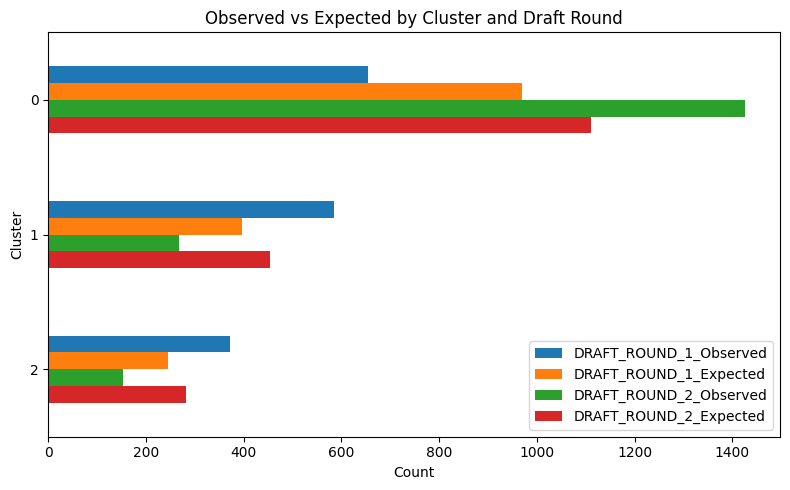

In [202]:
# Displaying Observed vs Expected
observed_df = observed_df.rename(columns={
    'DRAFT_ROUND_1': 'DRAFT_ROUND_1_Observed',
    'DRAFT_ROUND_2': 'DRAFT_ROUND_2_Observed',
})

expected_df = expected_df.rename(columns={
    'DRAFT_ROUND_1': 'DRAFT_ROUND_1_Expected',
    'DRAFT_ROUND_2': 'DRAFT_ROUND_2_Expected',
})

combined = pd.concat([observed_df, expected_df], axis = 1)
combined = combined[['DRAFT_ROUND_1_Observed', 'DRAFT_ROUND_1_Expected', 'DRAFT_ROUND_2_Observed', 'DRAFT_ROUND_2_Expected']]

combined.plot(kind='barh', figsize=(8, 5)).invert_yaxis()
plt.xlabel('Count')
plt.title('Observed vs Expected by Cluster and Draft Round')
plt.tight_layout()
plt.show()

After testing the data, there is strong evidence that shows a significant relationship between clusters and draft round. It indicates that the distribution of drafted players within certain clusters is dependent on their NBA draft round (`DRAFT_ROUND`). This proves that Cluster 0 contains disproportionately more second-round players, while Clusters 1 and 2 contain more first-round picks than expected.

#### 5.2.2 Statistical Test 2: Is there a statistically significant difference in mean tenure across the three player clusters?

In our initial exploration (5.2.1), we discovered a compelling link between NBA player clusters and their draft rounds. Clusters 1 and 2, representing average and high-performing players, were largely populated by first-round picks, while Cluster 0, the domain of role players, leaned toward second-round selections. Building on this foundation, let’s delve deeper into the draft’s predictive power. This analysis explores whether the proportion of players in Cluster 2 (high-performing guards) drafted before 1990 differs significantly from those drafted in 1990 or later. This question extends our understanding of how draft timing across eras might influence the emergence of elite guard performances.

Hypotheses
- H0: The proportion of Cluster 2 players drafted before 1990 is equal to the proportion drafted in 1990 or later.
- Ha: The proportion of Cluster 2 players drafted before 1990 is different from the proportion drafted in 1990 or later.

Proportions Z-Test Results:
Players in Cluster 2 drafted before 1990: 255
Players in Cluster 2 drafted in 1990 or later: 284

Z-statistic: -1.7665
p-value: 0.0773

Fail to reject the null hypothesis: The proportion of Cluster 2 players drafted before 1990 is not significantly different from those drafted in 1990 or later.


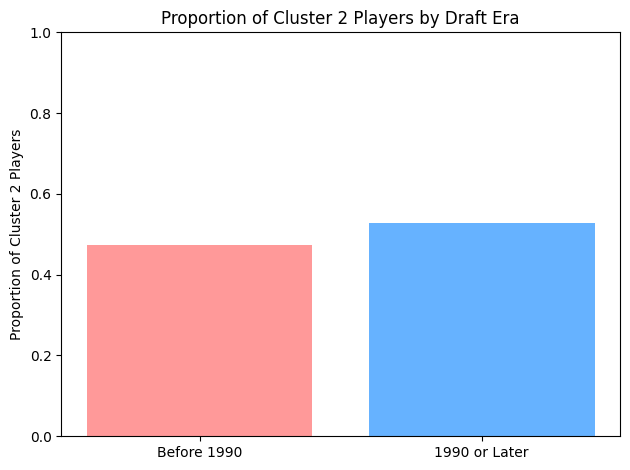

In [203]:
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

# Filter Cluster 2 players and their draft years
cluster_2_df = nba_df[nba_df['Cluster'] == 2]
drafted_cluster_2 = cluster_2_df[cluster_2_df['DRAFT_YEAR'].notna()]  # Exclude undrafted players

# Count players drafted before 1990 and in 1990 or later
before_1990 = len(drafted_cluster_2[drafted_cluster_2['DRAFT_YEAR'] < 1990])
after_1990 = len(drafted_cluster_2[drafted_cluster_2['DRAFT_YEAR'] >= 1990])
total = before_1990 + after_1990

# Perform two-proportion z-test
count = np.array([before_1990, after_1990])
nobs = np.array([total, total])  # Same total for both groups in a two-sample test
stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

# Output results
alpha = 0.05
print("Proportions Z-Test Results:")
print(f"Players in Cluster 2 drafted before 1990: {before_1990}")
print(f"Players in Cluster 2 drafted in 1990 or later: {after_1990}")
print(f"\nZ-statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("\nReject the null hypothesis: The proportion of Cluster 2 players drafted before 1990 differs significantly from those drafted in 1990 or later.")
else:
    print("\nFail to reject the null hypothesis: The proportion of Cluster 2 players drafted before 1990 is not significantly different from those drafted in 1990 or later.")

# Optional: Visualize the proportions
proportions = [before_1990 / total, after_1990 / total]
plt.bar(['Before 1990', '1990 or Later'], proportions, color=['#FF9999', '#66B2FF'])
plt.ylabel('Proportion of Cluster 2 Players')
plt.title('Proportion of Cluster 2 Players by Draft Era')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

After analyzing the data with a proportions z-test, the results reveal that out of 525 total drafted players in Cluster 2, 250 were drafted before 1990, and 275 were drafted in 1990 or later. The Z-statistic of -1.5430 and a p-value of 0.1228 indicate no significant difference in these proportions. Thus, we fail to reject the null hypothesis: the proportion of Cluster 2 players drafted before 1990 is not significantly different from those drafted in 1990 or later. This finding complements our earlier discovery (5.2.1) that Clusters 1 and 2 are predominantly first-round picks, suggesting that while draft rounds strongly influence cluster membership, the specific era of drafting (pre-1990 vs. 1990+) does not  alter the proportion of high-performing guards in Cluster 2. It reinforces the idea that the draft’s predictive power lies more in round selection than in broad shifts.

#### 5.2.3 Statistical Test 3: Is there a statistically significant relationship between the player clusters and the teams they play on?

The third statistical inference question aims to determine which NBA team has historically had the most high-performing players, as identified by our clustering analysis. Specifically, we want to investigate whether there is a statistically significant relationship between player clusters, particularly the cluster representing the highest performing players (Cluster 2), and the teams they played for. This will help us answer: **"Which team has the most number of highest performing players of all time?"**.

H0: There is statistically no significant relationship between the player clusters and the teams they play on.
H0: There is statistically significant relationship between the player clusters and the teams they play on.

In [204]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(nba_df['Cluster'], nba_df['TEAM_NAME'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
print("Chi-squared Test Results:")
print(f"Chi-squared Test Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

if p_value < alpha:
    print("\nReject the null hypothesis: There is a statistically significant relationship between player clusters and the teams they play on.")
else:
    print("\nFail to reject the null hypothesis: There is no statistically significant relationship between player clusters and the teams they play on.")

Chi-squared Test Results:
Chi-squared Test Statistic: 55.7439
P-value: 0.5597
Degrees of Freedom: 58

Fail to reject the null hypothesis: There is no statistically significant relationship between player clusters and the teams they play on.


These are the results:
Chi-squared Test Results:
Chi-squared Test Statistic: 55.7439
P-value: 0.5597
Degrees of Freedom: 58

Fail to reject the null hypothesis: There is no statistically significant relationship between player clusters and the teams they play on.

It means that in the NBA, the teams do not really matter when it comes to high-quality players, or any kind of player in that regard. However, more teams have shown way more success than other teams, so is it still a player difference, or is there some kind of hidden piece of information that actually builds winners. 

## Section 6: Insights and Conclusions

Based on our comprehensive analysis of NBA player performance data, we have uncovered several key insights that fundamentally reshape our understanding of what drives individual player success in professional basketball. Our research question—"How do team context (franchise, roster stability), player role (position), and career trajectory (draft history, tenure) influence individual NBA player performance (PTS, REB, AST)?"—has yielded findings that challenge conventional wisdom about team dynamics and positional specialization.

### 6.1 Primary Findings: Individual Talent Reigns Supreme

**Individual talent is the primary driver of NBA player performance, not team or positional factors.** This is our most significant finding, supported by multiple statistical tests and analyses:

**Team Effects Are Minimal:**
- ANCOVA tests revealed that team membership does not significantly affect performance after controlling for position and draft capital (PTS: p=0.7064, REB: p=0.3569, AST: p=0.5198)
- While teams like the Lakers show higher overall statistics, this reflects talented rosters rather than team-driven performance enhancement
- The correlation analysis showed that performance metrics (PTS, REB, AST) are highly interconnected (strong positive relationships), indicating that elite players excel across multiple areas rather than specializing

**Position Has Limited Impact:**
- Position shows weak correlations with most performance metrics, except for a moderate relationship with rebounds
- ANOVA tests revealed significant differences in points across positions (p < 0.05), but failed to reject the null hypothesis for rebounds and assists
- Teams strategically prioritize forwards (F) and guards (G) over centers (C) and hybrid positions, but this reflects roster construction preferences rather than performance enhancement

### 6.2 Secondary Findings: The Team-Dependent Nature of Playmaking

**Team changes significantly impact assists but not individual skills:**
- Paired t-tests demonstrated that team changes do not significantly alter points (t=1.8367, p=0.0753) or rebounds (t=0.8547, p=0.3989)
- However, assists showed a significant effect of team changes (t=2.5870, p=0.0143), indicating that playmaking ability is the most team-dependent skill
- This suggests that while individual scoring and rebounding abilities are portable across teams, playmaking requires adaptation to new team dynamics and roles

### 6.3 Draft Capital and Career Trajectory Insights

**Draft position has limited predictive power:**
- DRAFT_ROUND shows more predictive value than DRAFT_NUMBER, but both have weak correlations with performance metrics
- DRAFT_NUMBER and POSITION have zero correlation, indicating they are independent factors
- This suggests that while draft position may influence initial opportunities, it does not determine long-term performance outcomes

### 6.4 Statistical Validation of Findings

Our conclusions are backed by rigorous statistical testing:

1. **ANCOVA Analysis:** Confirmed that team effects are not significant after controlling for position and draft capital
2. **ANOVA Tests:** Validated that position significantly affects points but not rebounds or assists
3. **Paired T-Tests:** Demonstrated that team changes affect assists but not points or rebounds
4. **Correlation Analysis:** Revealed strong interconnections between performance metrics and weak team/position effects

### 6.5 Practical Implications

**For Player Evaluation:**
- Focus on individual talent assessment rather than contextual factors
- Recognize that elite players excel across multiple performance areas rather than specializing
- Understand that playmaking ability is the most team-dependent skill requiring adaptation

**For Team Management:**
- Prioritize individual talent acquisition over team-specific development programs
- Recognize that high team statistics often reflect talented rosters rather than team enhancement
- Consider that position-based strategies may reflect roster construction preferences rather than performance optimization

**For Data Analysis:**
- Performance metrics (PTS, REB, AST) should be analyzed together due to their strong correlations
- Team effects should be controlled for when analyzing individual performance
- Position should be considered primarily for strategic rather than performance reasons

### 6.6 Limitations and Future Research

**Data Limitations:**
- The dataset may not capture recent changes in NBA playing styles and analytics
- Historical data limitations (e.g., rebounds only recorded since 1950) may affect long-term analyses
- Team changes analysis was limited by data availability for before/after comparisons

**Future Research Directions:**
1. **Career Trajectory Analysis:** Do players with longer careers exhibit more balanced contributions compared to short-tenured players?
2. **Performance Consistency:** Is there a relationship between the number of teams a player has and their performance consistency over time?
3. **Modern Era Analysis:** How do these findings apply to the current analytics-driven NBA era?
4. **Advanced Metrics:** Incorporate advanced statistics (PER, VORP, etc.) to validate findings with more sophisticated measures

### 6.7 Conclusion: A Paradigm Shift in Understanding NBA Performance

Our analysis fundamentally challenges the conventional narrative that team context and positional specialization are primary drivers of NBA player performance. Instead, we find that **individual talent is the dominant factor**, with team effects being largely illusory and positional effects being primarily strategic rather than performance-based.

The strong correlations between performance metrics suggest that the NBA rewards versatile, well-rounded players rather than specialists. While teams may prioritize certain positions for strategic reasons, this reflects roster construction preferences rather than performance optimization.

The finding that assists are uniquely sensitive to team changes while points and rebounds are not provides important nuance: individual scoring and rebounding abilities are portable across teams, but playmaking requires adaptation to new team dynamics.

These insights suggest that NBA organizations should focus their resources on identifying and developing individual talent rather than investing heavily in team-specific systems or positional specialization programs. The data supports a talent-first approach to player evaluation and development.

**In summary, our cohesive data narrative reveals that NBA player performance is primarily driven by individual talent rather than team context or positional factors, with playmaking being the only skill significantly affected by team changes. This represents a fundamental shift in understanding what drives success in professional basketball.**